In [1]:
using DrWatson
@quickactivate "MEngProject"
using MEngProject, CUDA, DifferentialEquations, PyPlot, NNlib,  ImageFiltering, Images, MEngProject.LaminartKernels, MEngProject.LaminartInitFunc, MEngProject.Utils, BenchmarkTools, Test

In [2]:
using OrdinaryDiffEq, ParameterizedFunctions, LSODA, Sundials, DiffEqDevTools, Noise

# GPU

In [9]:
files = readdir(datadir("img"))

25-element Array{String,1}:
 ".ipynb_checkpoints"
 "Iine_gap_1_100_gs.png"
 "Iine_gap_2_100_gs.png"
 "Iine_gap_3_100_gs.png"
 "Iine_gap_4_100_gs.png"
 "Iines_gaps_100_gs.png"
 "diag_dots_100_gs.png"
 "diag_gap_100_gs.png"
 "kan_sq_cont.png"
 "kan_sq_cont_l.png"
 "mo05709.png"
 "stairs_100gs.png"
 "stairs_200gs.png"
 "viper00187.png"
 "viper00661.jpg"
 "viper00715.png"
 "viper00717.png"
 "viper00720.png"
 "viper00721.png"
 "viper00842.jpg"
 "viper00891.jpg"
 "viper00904.jpg"
 "viper00921.jpg"
 "viper01006.jpg"
 "viper01333.jpg"

In [12]:
tspan = (0.0f0, 100f0)
u0 = cu(reshape(zeros(Float32, p.dim_i, p.dim_j*(5*2+2)), p.dim_i, p.dim_j, 5*2+2,1));

arr1 = u0[:, :, 1:2,:]
arr2 = u0[:, :, 1:1,:];

f = LaminartFunc.LamFunction(
    similar(arr1), #x
    similar(arr1), #m
    similar(arr1), #s
 similar(arr2), #x_lgn,
similar(arr1), #C,
similar(arr1), #H_z,
similar(arr1), # dy_temp,
similar(arr1), # dm_temp,
similar(arr1), # dz_temp,
similar(arr1), # ds_temp,
similar(arr2), # dv_temp,
similar(arr1), # H_z_temp,
similar(arr2), #  V_temp_1,
similar(arr2), #  V_temp_2,
similar(arr1), #  A_temp,
similar(arr1), #   B_temp
    );


In [ ]:
for f in files
    

In [11]:
p = LaminartInitFunc.parameterInit_conv_gpu(datadir("img","kan_sq_cont_l.png"), Parameters.parameters_f32);

In [13]:
p = LaminartInitFunc.parameterInit_conv_gpu(datadir("img",f), Parameters.parameters_f32);
u0 = cu(reshape(zeros(Float32, p.dim_i, p.dim_j*(5*2+2)), p.dim_i, p.dim_j, 5*2+2,1));

prob = ODEProblem(f, u0, tspan, p);
@benchmark sol = solve(prob)
sol = solve(prob);

MethodError: MethodError: no method matching joinpath(::String, ::String, ::String, ::MEngProject.LaminartFunc.LamFunction{CuArray{Float32,4}})
Closest candidates are:
  joinpath(::AbstractString, !Matched::AbstractString...) at path.jl:290
  joinpath(::AbstractString) at path.jl:244

In [92]:
a = @benchmark 1+1

BenchmarkTools.Trial: 
  memory estimate:  0 bytes
  allocs estimate:  0
  --------------
  minimum time:     0.037 ns (0.00% GC)
  median time:      0.040 ns (0.00% GC)
  mean time:        0.041 ns (0.00% GC)
  maximum time:     0.110 ns (0.00% GC)
  --------------
  samples:          10000
  evals/sample:     1000

In [93]:
a

BenchmarkTools.Trial: 
  memory estimate:  0 bytes
  allocs estimate:  0
  --------------
  minimum time:     0.037 ns (0.00% GC)
  median time:      0.040 ns (0.00% GC)
  mean time:        0.041 ns (0.00% GC)
  maximum time:     0.110 ns (0.00% GC)
  --------------
  samples:          10000
  evals/sample:     1000

In [6]:
@benchmark sol = solve(prob)

BenchmarkTools.Trial: 
  memory estimate:  254.28 MiB
  allocs estimate:  5436296
  --------------
  minimum time:     2.854 s (2.22% GC)
  median time:      2.883 s (2.93% GC)
  mean time:        2.883 s (2.93% GC)
  maximum time:     2.913 s (3.62% GC)
  --------------
  samples:          2
  evals/sample:     1

In [7]:
Utils.plot_rb(sol[:,:,10,1,end])

┌ Warning: Performing scalar operations on GPU arrays: This is very slow, consider disallowing these operations with `allowscalar(false)`
└ @ GPUArrays /mnt/storage_1/users/cullinanen/.julia/packages/GPUArrays/eVYIC/src/host/indexing.jl:43


ArgumentError: ArgumentError: Image has max 1.0835975,outside range

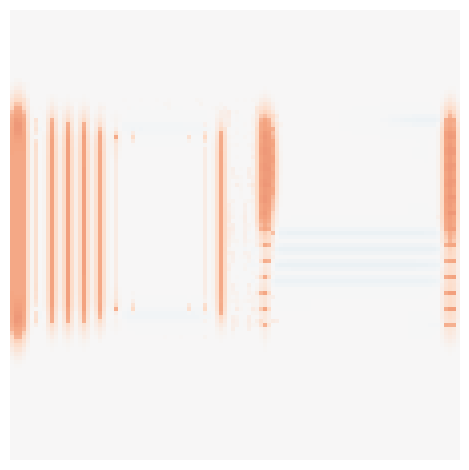

In [8]:
Utils.plot_rb(sol[:,:,7,1,end])

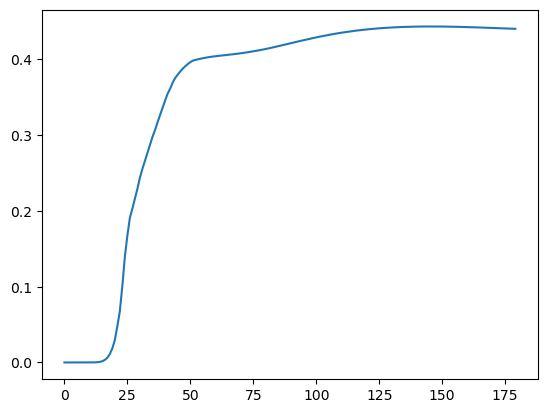

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7f51084d1990>

In [9]:
plot(sol[findmax(sol[:,:,7,1,end])[2][1],findmax(sol[:,:,7,1,end])[2][2],7,1,:])

In [84]:
sol_1 = Array(sol)
sol = nothing;

In [10]:
typeof(sol)

ODESolution{Float32,5,Array{CuArray{Float32,4},1},Nothing,Nothing,Array{Float32,1},Array{Array{CuArray{Float32,4},1},1},ODEProblem{CuArray{Float32,4},Tuple{Float32,Float32},true,NamedTuple{(:K, :δ_v, :δ_c, :δ_m, :δ_z, :δ_s, :σ_1, :C_1, :C_2, :σ_2, :γ, :α, :ϕ, :Γ, :v_21, :μ, :ν, :n, :att, :η_p, :η_m, :λ, :a_23_ex, :a_23_in, :v12_6, :v12_4, :ψ, :C_AB_l, :H_σ_x, :H_σ_y, :H_fact, :H_l, :T_fact, :T_p_m, :T_v2_fact, :H_size, :W_size, :W_p_σ_x_same_a, :W_p_σ_x_same_b, :W_p_σ_y_same_a, :W_p_σ_y_same_b, :W_p_σ_opp_a, :W_p_σ_x_opp_b, :W_p_σ_x_opp_c, :W_p_σ_y_opp_b, :W_p_σ_y_opp_c, :W_p_same_fact, :W_p_opp_fact_a, :W_p_opp_fact_b, :W_m_σ_x_same_a, :W_m_σ_x_same_b, :W_m_σ_y_same_a, :W_m_σ_y_same_b, :W_m_σ_opp_a, :W_m_σ_x_opp_b, :W_m_σ_x_opp_c, :W_m_σ_y_opp_b, :W_m_σ_y_opp_c, :W_m_same_fact, :W_m_opp_fact_a, :W_m_opp_fact_b, :lgn_equ_u, :lgn_equ_A, :lgn_equ_B, :W_l, :k_gauss_1, :k_gauss_2, :k_C_A, :k_C_B, :k_x_lgn, :k_W_p, :k_W_m, :k_H, :k_T_p, :k_T_m, :k_T_p_v2, :k_T_m_v2, :dim_i, :dim_j, :x_V2, :

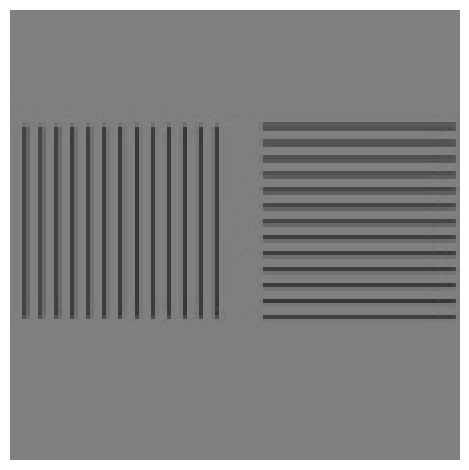

In [79]:
Utils.plot_gs(p.I[:,:,1,1])

In [ ]:
fig, ax = plt.subplots()

    im = ax.imshow(p.I, cmap=matplotlib.cm.gray,
               vmax=axMax, vmin=axMin)
    if clbar
        cbar = fig.colorbar(im,  shrink=0.9, ax=ax)
    end

    plt.axis("off")
    fig.tight_layout()
    plt.show()

In [76]:
p.I

112×112×1×1 CuArray{Float32,4}:
[:, :, 1, 1] =
 1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  …  1.0  1.0  1.0  1.0  1.0  1.0  1.0
 1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0     1.0  1.0  1.0  1.0  1.0  1.0  1.0
 1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0     1.0  1.0  1.0  1.0  1.0  1.0  1.0
 1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0     1.0  1.0  1.0  1.0  1.0  1.0  1.0
 1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0     1.0  1.0  1.0  1.0  1.0  1.0  1.0
 1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  …  1.0  1.0  1.0  1.0  1.0  1.0  1.0
 1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0     1.0  1.0  1.0  1.0  1.0  1.0  1.0
 1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0     1.0  1.0  1.0  1.0  1.0  1.0  1.0
 1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0     1.0  1.0  1.0  1.0  1.0  1.0  1.0
 1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0     1.0  1.0  1.0  1.0  1.0  1.0  1.0
 1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  …  1.0  1.0  1.0  1.0  1.0  1.0  1.0
 1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0     1.0  1.0  1.0  1.0  1.0  1.0  1.0
 1.0  1.0  1.0  1

In [449]:
p = LaminartInitFunc.parameterInit_conv_gpu(datadir("vis_illusionsDS","viper00661.jpg"), Parameters.parameters_f32);

In [506]:
tspan = (0.0f0, 500f0)
u0 = cu(reshape(zeros(Float32, p.dim_i, p.dim_j*(5*p.K+2)), p.dim_i, p.dim_j, 5*p.K+2,1));

arr1 = u0[:, :, 1:p.K,:]
arr2 = u0[:, :, 1:1,:];

f = LaminartFunc.LamFunction(
    similar(arr1), #x
    similar(arr1), #m
    similar(arr1), #s
 similar(arr2), #x_lgn,
similar(arr1), #C,
similar(arr1), #H_z,
similar(arr1), # dy_temp,
similar(arr1), # dm_temp,
similar(arr1), # dz_temp,
similar(arr1), # ds_temp,
similar(arr2), # dv_temp,
similar(arr1), # H_z_temp,
similar(arr2), #  V_temp_1,
similar(arr2), #  V_temp_2,
similar(arr1), #  A_temp,
similar(arr1), #   B_temp
    );

prob = ODEProblem(f, u0, tspan, p);

In [533]:
sol = solve(prob)

OutOfGPUMemoryError: Out of GPU memory trying to allocate 588.000 KiB
Effective GPU memory usage: 100.00% (11.172 GiB/11.172 GiB)
CUDA allocator usage: 11.010 GiB
binned usage: 11.010 GiB (11.010 GiB allocated, 0 bytes cached)


In [472]:
@benchmark sol = solve(prob)

BenchmarkTools.Trial: 
  memory estimate:  476.78 MiB
  allocs estimate:  10198528
  --------------
  minimum time:     5.357 s (2.33% GC)
  median time:      5.357 s (2.33% GC)
  mean time:        5.357 s (2.33% GC)
  maximum time:     5.357 s (2.33% GC)
  --------------
  samples:          1
  evals/sample:     1

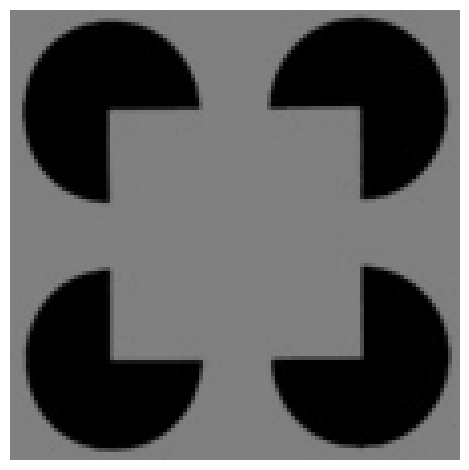

In [508]:
Utils.plot_gs(p.I[:,:,1,1])

In [509]:
Utils.plot_rb(sol[:,:,10,1,end])

ArgumentError: ArgumentError: Image has max 1.7619838,outside range

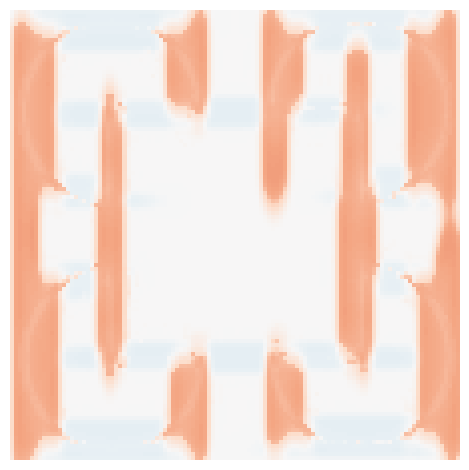

In [510]:
Utils.plot_rb(sol[:,:,7,1,end])

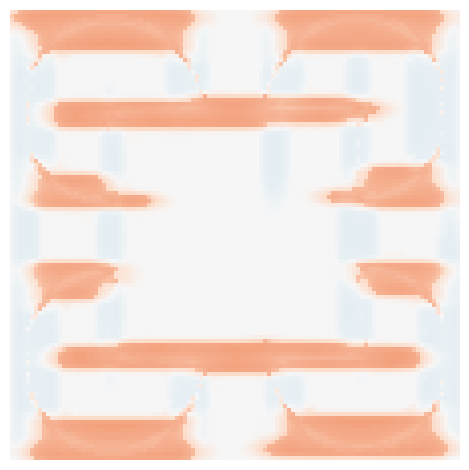

In [511]:
Utils.plot_rb(sol[:,:,8,1,end])

In [530]:
k=9;

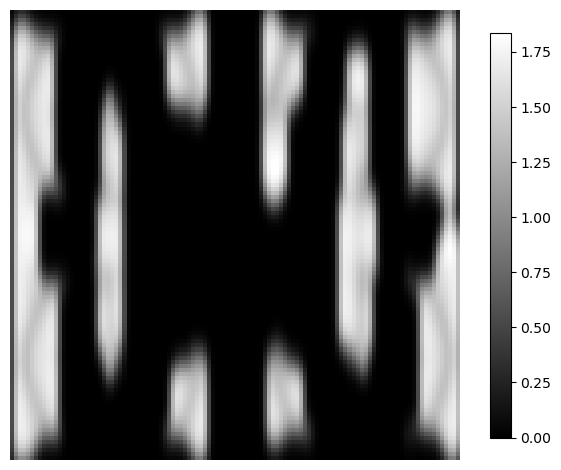

In [531]:
Utils.plot_gs(sol[:,:,k,1,end],axMin=findmin(sol[:,:,k,1,end])[1], axMax=findmax(sol[:,:,k,1,end])[1], clbar=true)

In [468]:
Utils.plot_gs(sol[:,:,3,1],axMin=-1e-5)

MethodError: MethodError: no method matching getindex(::Nothing, ::Colon, ::Colon, ::Int64, ::Int64)

In [469]:
Utils.plot_gs(sol[:,:,4,1,end],axMin=-2e-9)

MethodError: MethodError: no method matching lastindex(::Nothing, ::Int64)
Closest candidates are:
  lastindex(!Matched::AbstractArray, ::Any) at abstractarray.jl:303

In [461]:
Utils.plot_gs(sol[:,:,5,1,end],axMin=-2e-9)

ArgumentError: ArgumentError: Image has min -2.3361122e-9,outside range

In [462]:
Utils.plot_gs(sol[:,:,6,1,end],axMin=-1e-10)

ArgumentError: ArgumentError: Image has min -1.39598555e-8,outside range

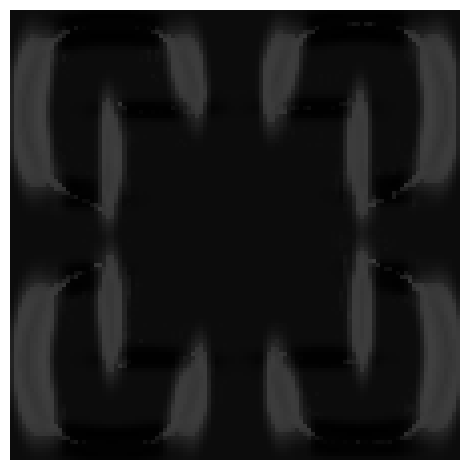

In [463]:
Utils.plot_gs(sol[:,:,7,1,end],axMin=-1e-1)

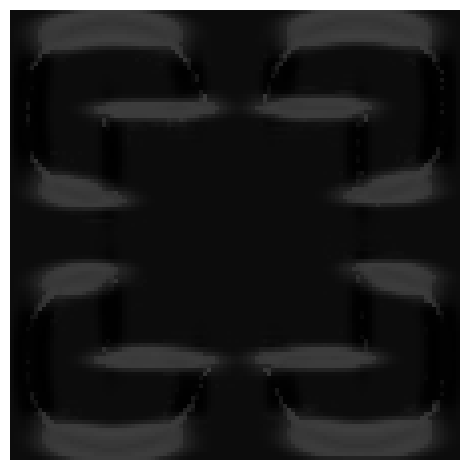

In [464]:
Utils.plot_gs(sol[:,:,8,1,end],axMin=-1e-1)

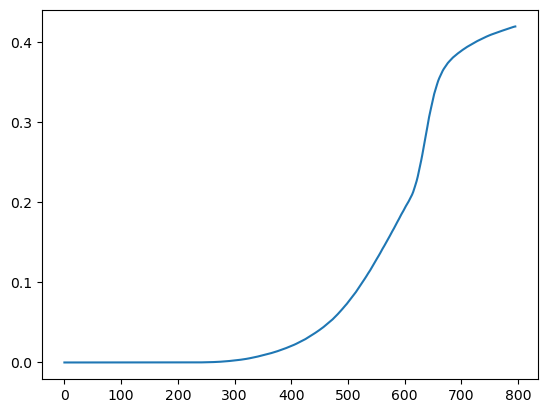

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7f14412f5210>

In [532]:
plot(sol[findmax(sol[:,:,7,1,end])[2][1],findmax(sol[:,:,7,1,end])[2][2],7,1,:])

In [466]:
sol_1 = Array(sol)
sol = nothing;

# Try increasing length of H

In [132]:
p = Parameters.parameters_f32

(K = 2, δ_v = 1.25f0, δ_c = 0.25f0, δ_m = 0.01875f0, δ_z = 0.125f0, δ_s = 2.5f0, σ_1 = 1.0f0, C_1 = 1.5f0, C_2 = 0.075f0, σ_2 = 0.5f0, γ = 10.0f0, α = 0.5f0, ϕ = 2.0f0, Γ = 0.2f0, v_21 = 0.0f0, μ = 2.0f0, ν = 1.1f0, n = 6.0f0, att = 0.0f0, η_p = 2.1f0, η_m = 1.5f0, λ = 1.5f0, a_23_ex = 3.0f0, a_23_in = 0.5f0, v12_6 = 1.0f0, v12_4 = 5.0f0, ψ = 0.5f0, C_AB_l = 5, H_σ_x = 3.0f0, H_σ_y = 4.0f0, H_fact = 5.0f0, H_l = 19, T_fact = Float32[0.87, 0.13], T_p_m = 0.302f0, T_v2_fact = 0.625f0, H_size = 19, W_size = 19, lgn_equ_u = 1.0f0, lgn_equ_A = 0.0f0, lgn_equ_B = 0.0f0, filling = "circular", W_l = 19)

In [133]:
p = merge(p, (H_l = 25, ))

(K = 2, δ_v = 1.25f0, δ_c = 0.25f0, δ_m = 0.01875f0, δ_z = 0.125f0, δ_s = 2.5f0, σ_1 = 1.0f0, C_1 = 1.5f0, C_2 = 0.075f0, σ_2 = 0.5f0, γ = 10.0f0, α = 0.5f0, ϕ = 2.0f0, Γ = 0.2f0, v_21 = 0.0f0, μ = 2.0f0, ν = 1.1f0, n = 6.0f0, att = 0.0f0, η_p = 2.1f0, η_m = 1.5f0, λ = 1.5f0, a_23_ex = 3.0f0, a_23_in = 0.5f0, v12_6 = 1.0f0, v12_4 = 5.0f0, ψ = 0.5f0, C_AB_l = 5, H_σ_x = 3.0f0, H_σ_y = 4.0f0, H_fact = 5.0f0, H_l = 25, T_fact = Float32[0.87, 0.13], T_p_m = 0.302f0, T_v2_fact = 0.625f0, H_size = 19, W_size = 19, lgn_equ_u = 1.0f0, lgn_equ_A = 0.0f0, lgn_equ_B = 0.0f0, filling = "circular", W_l = 19)

In [134]:
p.H_l

25

ArgumentError: ArgumentError: invalid index: :H_l of type Symbol

In [135]:
p = LaminartInitFunc.parameterInit_conv_gpu(datadir("vis_illusionsDS","viper00661.jpg"), p);

In [136]:
tspan = (0.0f0, 100f0)
u0 = cu(reshape(zeros(Float32, p.dim_i, p.dim_j*(5*p.K+2)), p.dim_i, p.dim_j, 5*p.K+2,1));

arr1 = u0[:, :, 1:p.K,:]
arr2 = u0[:, :, 1:1,:];

f = LaminartFunc.LamFunction(
    similar(arr1), #x
    similar(arr1), #m
    similar(arr1), #s
 similar(arr2), #x_lgn,
similar(arr1), #C,
similar(arr1), #H_z,
similar(arr1), # dy_temp,
similar(arr1), # dm_temp,
similar(arr1), # dz_temp,
similar(arr1), # ds_temp,
similar(arr2), # dv_temp,
similar(arr1), # H_z_temp,
similar(arr2), #  V_temp_1,
similar(arr2), #  V_temp_2,
similar(arr1), #  A_temp,
similar(arr1), #   B_temp
    );

prob = ODEProblem(f, u0, tspan, p);

In [137]:
sol = solve(prob);

In [88]:
@benchmark sol = solve(prob)

BenchmarkTools.Trial: 
  memory estimate:  162.04 MiB
  allocs estimate:  3345849
  --------------
  minimum time:     1.778 s (0.00% GC)
  median time:      1.874 s (3.01% GC)
  mean time:        1.844 s (2.08% GC)
  maximum time:     1.881 s (3.00% GC)
  --------------
  samples:          3
  evals/sample:     1

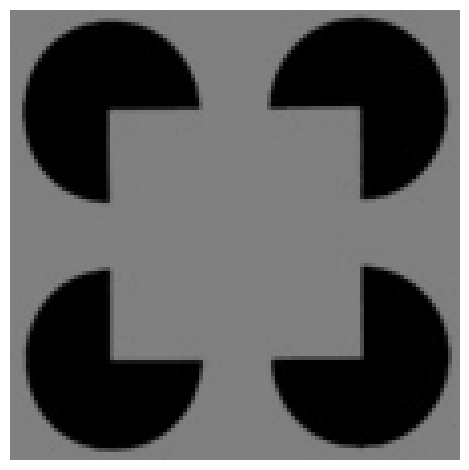

In [93]:
Utils.plot_gs(p.I[:,:,1,1])

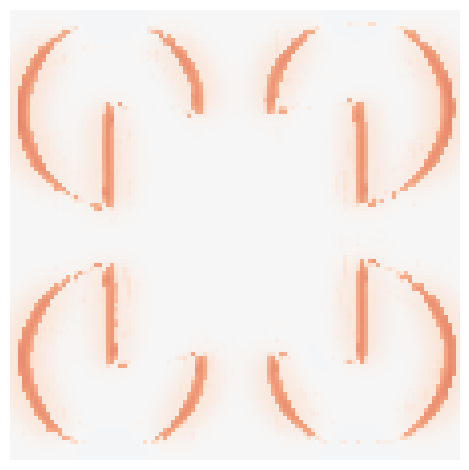

In [139]:
Utils.plot_rb(sol[:,:,7,1,end])

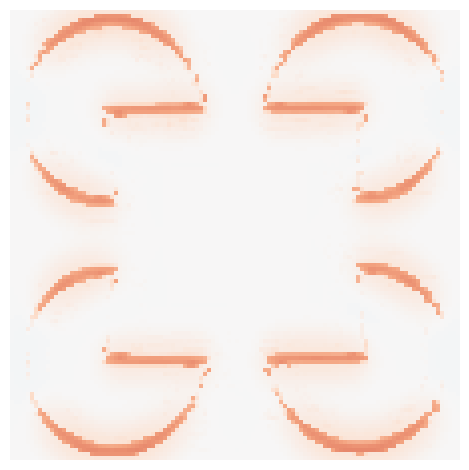

In [140]:
Utils.plot_rb(sol[:,:,8,1,end])

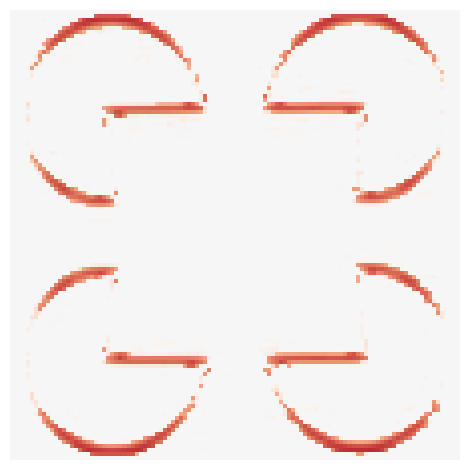

In [142]:
Utils.plot_rb(sol[:,:,4,1,end])

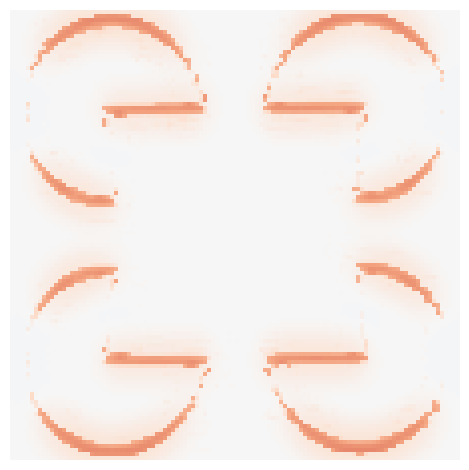

In [92]:
Utils.plot_rb(sol[:,:,8,1,end])

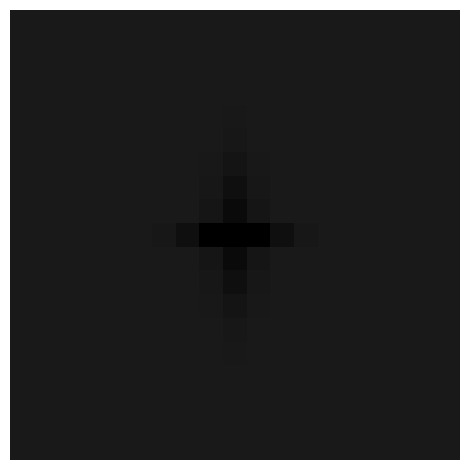

In [160]:
Utils.plot_gs(p.k_W_p[:,:,1,2])

In [441]:
T_temp = reshape(Array{eltype(Float32)}(undef, p.K * p.K), 1, 1, p.K, p.K)
H_temp = reshape(zeros(eltype(Float32), p.H_l, p.H_l * p.K * p.K),p.H_l,p.H_l,p.K,p.K) 
W_temp = reshape(Array{eltype(Float32)}(undef, p.W_l, p.W_l * p.K * p.K), p.W_l, p.W_l, p.K, p.K)

# for k ∈ 1:p.K
#         θ = π * (k - 1.0f0) / p.K
# H_temp[:, :, k,k] = 13f0 .* LaminartKernels.gaussian_rot(5, 0.5, θ, p.H_l)
# # 		todo make T kernel more general for higher K
#         T_temp[1, 1, k,1] = p.T_fact[k]
#         T_temp[1, 1, 2,2] = p.T_fact[1]
#         T_temp[1, 1, 1,2] = p.T_fact[2]
#         #todo: generalise T and W for higher K
#         #         T_temp[:,:,k] = KernelFactors.gaussian(p.T_σ, p.K)
#         #         for l ∈ 1:p.K
#         #             W_temp[:,:,l,k] =
#         #         end
#     end

    W_temp[:, :, 1, 1] =
        330f0 .* LaminartKernels.gaussian_rot(6f0, 2.5f0, 0f0, p.W_l) .+
        LaminartKernels.gaussian_rot(3f0, 4f0, 0f0, p.W_l)

#     W_temp[:, :, 2, 2] =
#         5f0 .* LaminartKernels.gaussian_rot(3f0, 0.8f0,  π / 2f0, p.W_l) .+
#         LaminartKernels.gaussian_rot(0.4f0, 1f0, π / 2f0, p.W_l)

#     W_temp[:, :, 1, 2] = relu.(
#         0.2f0 .- LaminartKernels.gaussian_rot(2f0, 0.6f0, 0f0, p.W_l) .-
#         LaminartKernels.gaussian_rot(0.3f0, 1.2f0, 0f0, p.W_l))

#     W_temp[:, :, 2, 1] = relu.(
#         0.2f0 .- LaminartKernels.gaussian_rot(2f0, 0.6f0, π / 2f0, p.W_l) .-
#         LaminartKernels.gaussian_rot(0.3f0, 1.2f0, π / 2f0, p.W_l));

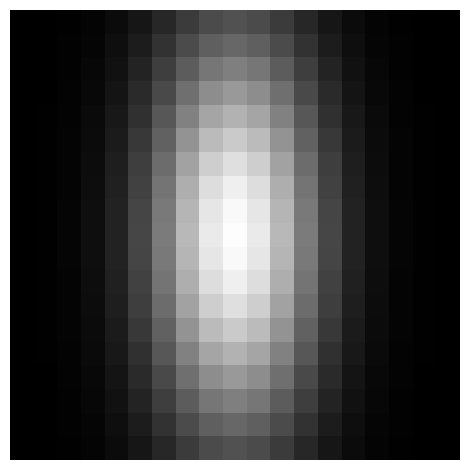

In [443]:
Utils.plot_gs(W_temp[:,:,1,1],axMax=4)

In [423]:
findmax(W_temp[:,:,1,1])

(0.29280892f0, CartesianIndex(7, 7))

In [444]:
p = LaminartInitFunc.parameterInit_conv_gpu(datadir("vis_illusionsDS","viper00626.jpg"), Parameters.parameters_f32);

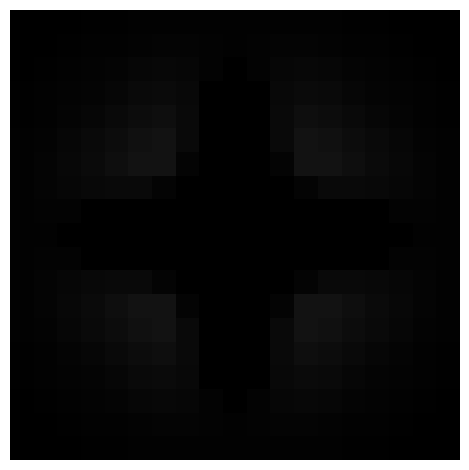

In [448]:
Utils.plot_gs(p.k_W_m[:,:,1,2],axMax=4)

In [6]:
readdir(datadir("vis_illusionsDS"))

26-element Array{String,1}:
 ".ipynb_checkpoints"
 "citation.bib"
 "mo05621.jpg"
 "mo05709.jpg"
 "mo05739.jpg"
 "mo05996.jpg"
 "viper00116.jpg"
 "viper00187.jpg"
 "viper00626.jpg"
 "viper00661.jpg"
 "viper00695.jpg"
 "viper00715.jpg"
 "viper00717.jpg"
 "viper00720.jpg"
 "viper00721.jpg"
 "viper00842.jpg"
 "viper00891.jpg"
 "viper00904.jpg"
 "viper00921.jpg"
 "viper00922.jpg"
 "viper00924.jpg"
 "viper00926.jpg"
 "viper00999.jpg"
 "viper01006.jpg"
 "viper01091.jpg"
 "viper01333.jpg"

In [26]:
files = readdir(datadir())

31-element Array{String,1}:
 "I_100_100_gs copy.xcf"
 "I_100_100_gs.png"
 "I_100_100_gs.xcf"
 "Iine_100_100_gs.png"
 "Iine_gap_1_100_gs.tif"
 "Iine_gap_2_100_gs.tif"
 "Iine_gap_3_100_gs.tif"
 "Iine_gap_4_100_gs.tif"
 "Iine_gaps_100_gs.tif"
 "Iines_gaps_100_gs.tif"
 "anim_fps15.gif"
 "black_100_100_gs.png"
 "diag_gap_100_gs.tif"
 ⋮
 "single_line.png"
 "single_line.svg"
 "single_line_large.png"
 "stairs_100gs.tif"
 "temp1_100_100_gs.png"
 "temp2_100_100_gs.png"
 "temp3_100_100_gs.png"
 "temp4_100_100_gs.png"
 "temp5_100_100_gs.png"
 "temp_100_100_gs.png"
 "viper00661.jpg"
 "vis_illusionsDS"

In [8]:
p = LaminartInitFunc.parameterInit_conv_gpu(datadir("stairs_100gs.tif"), Parameters.parameters_f32);

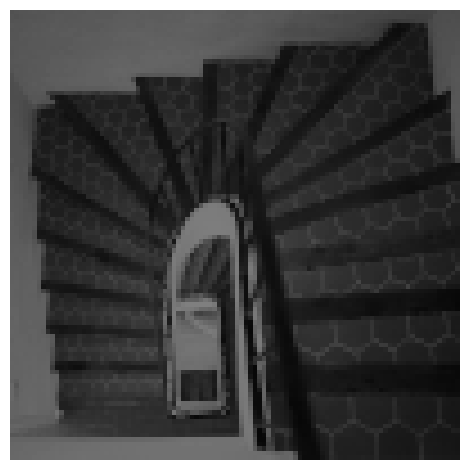

┌ Warning: Performing scalar operations on GPU arrays: This is very slow, consider disallowing these operations with `allowscalar(false)`
└ @ GPUArrays /mnt/storage_1/users/cullinanen/.julia/packages/GPUArrays/eVYIC/src/host/indexing.jl:43


In [9]:
Utils.plot_gs(p.I[:,:,1,1])

In [10]:
tspan = (0.0f0, 100f0)
u0 = cu(reshape(zeros(Float32, p.dim_i, p.dim_j*(5*p.K+2)), p.dim_i, p.dim_j, 5*p.K+2,1));

arr1 = u0[:, :, 1:p.K,:]
arr2 = u0[:, :, 1:1,:];

f = LaminartFunc.LamFunction(
    similar(arr1), #x
    similar(arr1), #m
    similar(arr1), #s
 similar(arr2), #x_lgn,
similar(arr1), #C,
similar(arr1), #H_z,
similar(arr1), # dy_temp,
similar(arr1), # dm_temp,
similar(arr1), # dz_temp,
similar(arr1), # ds_temp,
similar(arr2), # dv_temp,
similar(arr1), # H_z_temp,
similar(arr2), #  V_temp_1,
similar(arr2), #  V_temp_2,
similar(arr1), #  A_temp,
similar(arr1), #   B_temp
    );

prob = ODEProblem(f, u0, tspan, p);

In [11]:
sol = solve(prob);

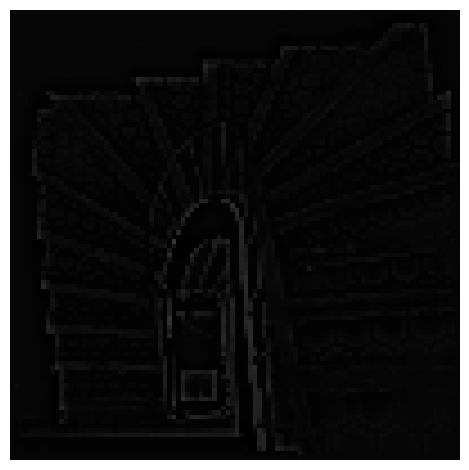

In [25]:
Utils.plot_gs(sol[:,:,12,1,end],axMin=-5e-2)


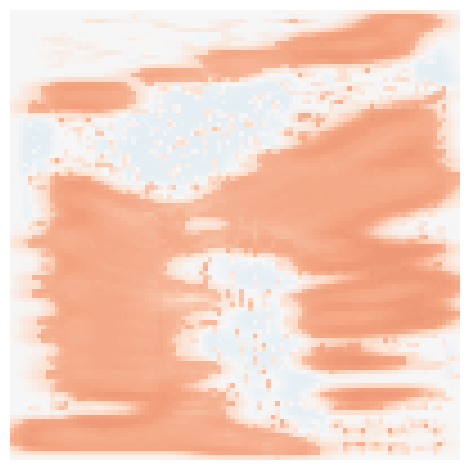

In [13]:
Utils.plot_rb(sol[:,:,8,1,end])

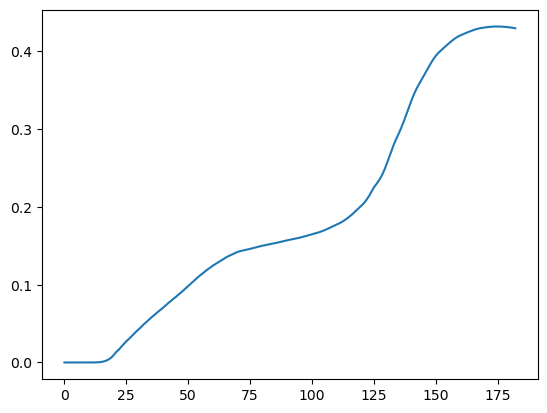

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7f99b661a250>

In [14]:
plot(sol[findmax(sol[:,:,7,1,end])[2][1],findmax(sol[:,:,7,1,end])[2][2],7,1,:])

In [28]:
files[10:20]

11-element Array{String,1}:
 "Iines_gaps_100_gs.tif"
 "anim_fps15.gif"
 "black_100_100_gs.png"
 "diag_gap_100_gs.tif"
 "kan_sq_cont.png"
 "kan_sq_cont.tif"
 "kan_sq_cont.tiff"
 "kan_sq_cont.xcf"
 "large.png"
 "single_line copy.svg"
 "single_line.png"

In [33]:
p = LaminartInitFunc.parameterInit_conv_gpu(datadir("kan_sq_cont.png"), Parameters.parameters_f32);

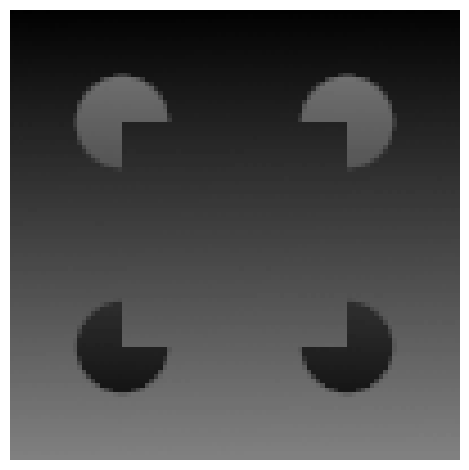

In [34]:
Utils.plot_gs(p.I[:,:,1,1])

In [35]:
tspan = (0.0f0, 100f0)
u0 = cu(reshape(zeros(Float32, p.dim_i, p.dim_j*(5*p.K+2)), p.dim_i, p.dim_j, 5*p.K+2,1));

arr1 = u0[:, :, 1:p.K,:]
arr2 = u0[:, :, 1:1,:];

f = LaminartFunc.LamFunction(
    similar(arr1), #x
    similar(arr1), #m
    similar(arr1), #s
 similar(arr2), #x_lgn,
similar(arr1), #C,
similar(arr1), #H_z,
similar(arr1), # dy_temp,
similar(arr1), # dm_temp,
similar(arr1), # dz_temp,
similar(arr1), # ds_temp,
similar(arr2), # dv_temp,
similar(arr1), # H_z_temp,
similar(arr2), #  V_temp_1,
similar(arr2), #  V_temp_2,
similar(arr1), #  A_temp,
similar(arr1), #   B_temp
    );

prob = ODEProblem(f, u0, tspan, p);

In [36]:
sol = solve(prob);

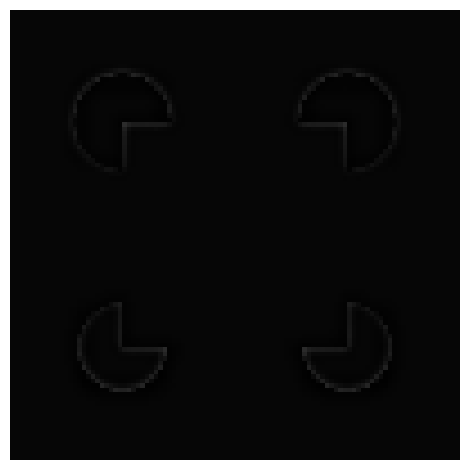

In [37]:
Utils.plot_gs(sol[:,:,12,1,end],axMin=-5e-2)


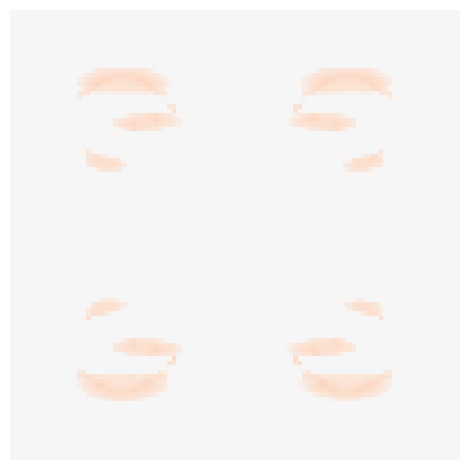

In [40]:
Utils.plot_rb(sol[:,:,6,1,end])

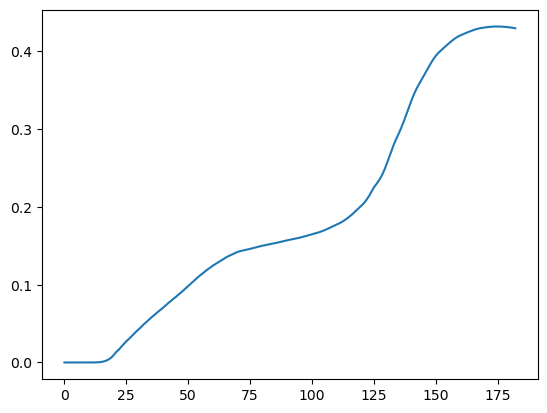

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7f99b661a250>

In [14]:
plot(sol[findmax(sol[:,:,7,1,end])[2][1],findmax(sol[:,:,7,1,end])[2][2],7,1,:])

# Increase tspan

In [46]:
tspan = (0.0f0, 300f0)

prob = ODEProblem(f, u0, tspan, p);

In [47]:
sol = solve(prob);

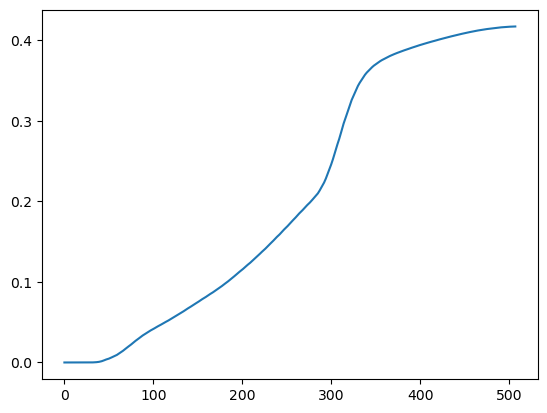

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7f9964500290>

In [48]:
plot(sol[findmax(sol[:,:,7,1,end])[2][1],findmax(sol[:,:,7,1,end])[2][2],7,1,:])

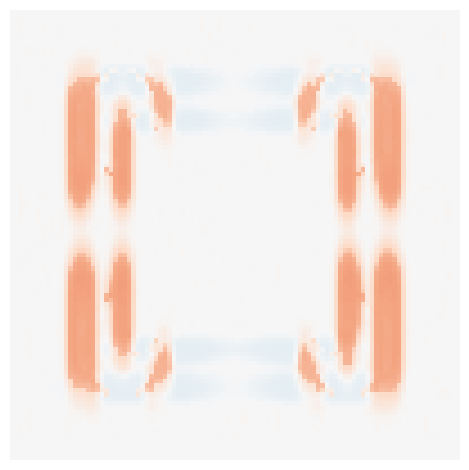

In [49]:
Utils.plot_rb(sol[:,:,7,1,end])

In [50]:
tspan = (0.0f0, 600f0)


prob = ODEProblem(f, u0, tspan, p);

In [51]:
sol = solve(prob);

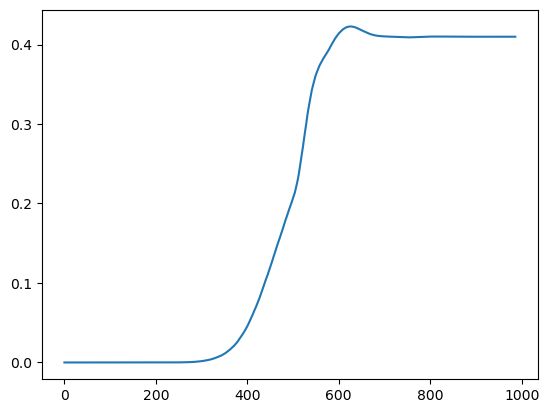

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7f99b969d290>

In [52]:
plot(sol[findmax(sol[:,:,7,1,end])[2][1],findmax(sol[:,:,7,1,end])[2][2],7,1,:])

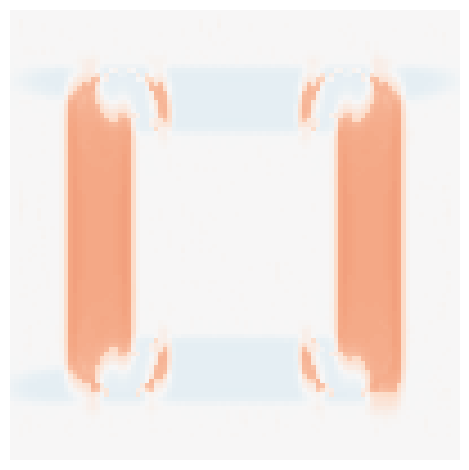

In [53]:
Utils.plot_rb(sol[:,:,7,1,end])

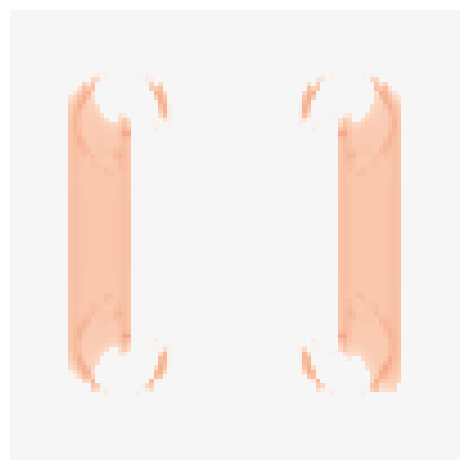

In [54]:
Utils.plot_rb(sol[:,:,1,1,end])

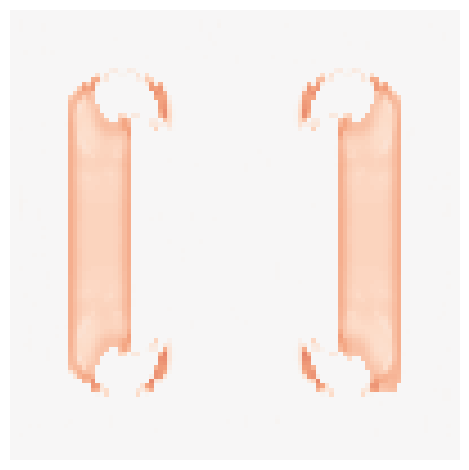

In [55]:
Utils.plot_rb(sol[:,:,3,1,end])

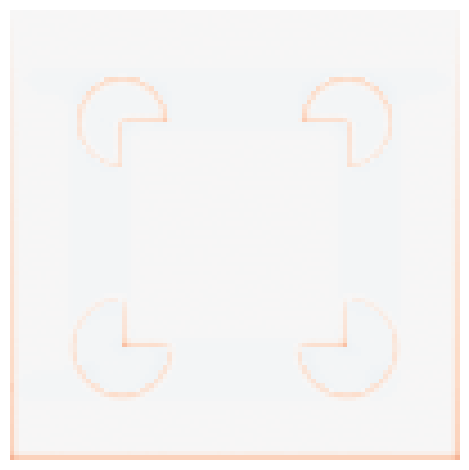

# Kan sq with larger circles

In [57]:
p = LaminartInitFunc.parameterInit_conv_gpu(datadir("kan_sq_cont_l.png"), Parameters.parameters_f32);

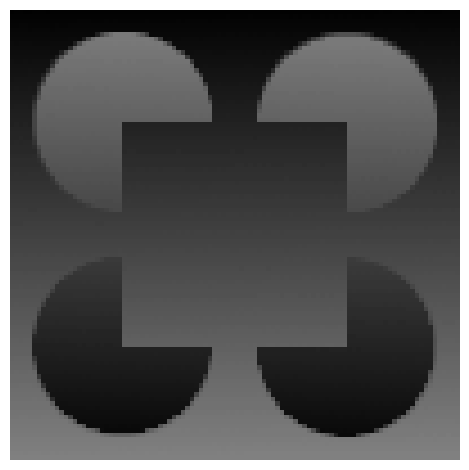

In [58]:
Utils.plot_gs(p.I[:,:,1,1])

In [59]:
tspan = (0.0f0, 100f0)
u0 = cu(reshape(zeros(Float32, p.dim_i, p.dim_j*(5*p.K+2)), p.dim_i, p.dim_j, 5*p.K+2,1));

arr1 = u0[:, :, 1:p.K,:]
arr2 = u0[:, :, 1:1,:];

f = LaminartFunc.LamFunction(
    similar(arr1), #x
    similar(arr1), #m
    similar(arr1), #s
 similar(arr2), #x_lgn,
similar(arr1), #C,
similar(arr1), #H_z,
similar(arr1), # dy_temp,
similar(arr1), # dm_temp,
similar(arr1), # dz_temp,
similar(arr1), # ds_temp,
similar(arr2), # dv_temp,
similar(arr1), # H_z_temp,
similar(arr2), #  V_temp_1,
similar(arr2), #  V_temp_2,
similar(arr1), #  A_temp,
similar(arr1), #   B_temp
    );

prob = ODEProblem(f, u0, tspan, p);

In [60]:
sol = solve(prob);

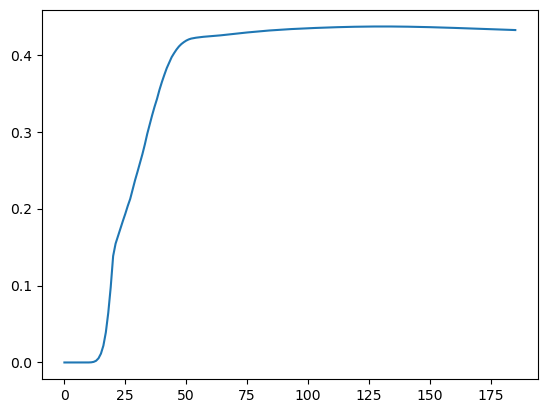

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7f9965255d90>

In [61]:
plot(sol[findmax(sol[:,:,7,1,end])[2][1],findmax(sol[:,:,7,1,end])[2][2],7,1,:])

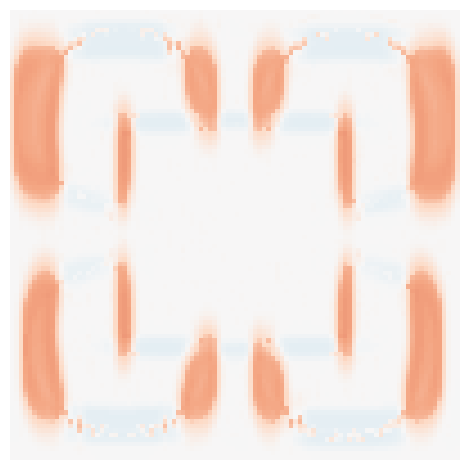

In [63]:
Utils.plot_rb(sol[:,:,7,1,end])

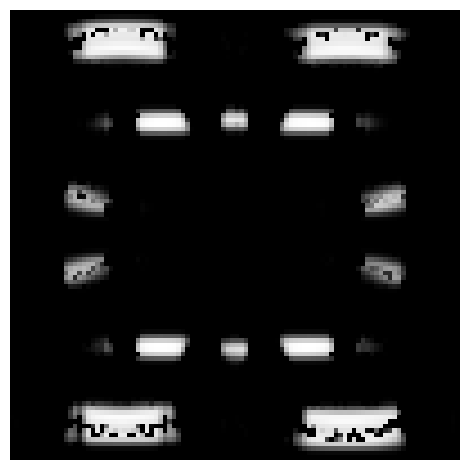

In [69]:
Utils.plot_gs(relu.(-1 .* sol[:,:,7,1,end]), axMax=findmax(relu.(-1 .* sol[:,:,7,1,end]))[1])

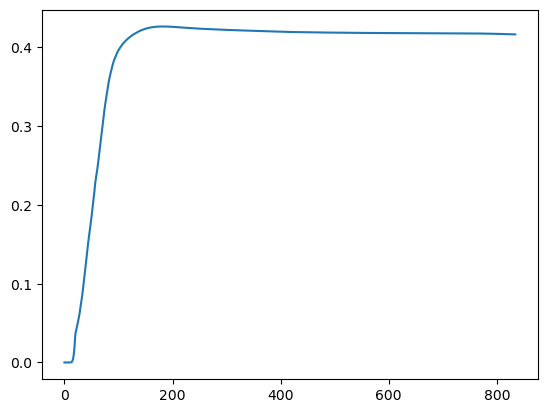

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7f9964fded10>

In [71]:
tspan = (0.0f0, 500f0)

prob = ODEProblem(f, u0, tspan, p);
sol = solve(prob)
plot(sol[findmax(sol[:,:,7,1,end])[2][1],findmax(sol[:,:,7,1,end])[2][2],7,1,:])

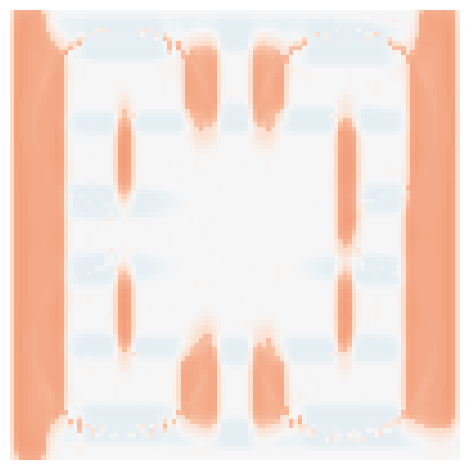

In [72]:
Utils.plot_rb(sol[:,:,7,1,end])

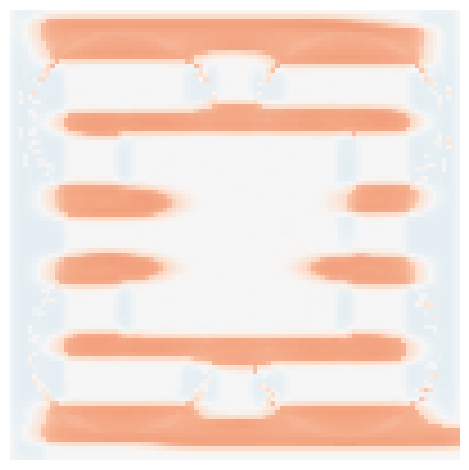

In [73]:
Utils.plot_rb(sol[:,:,8,1,end])

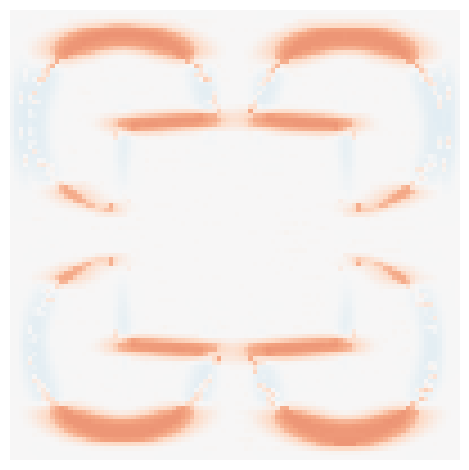

In [79]:
Utils.plot_rb(sol[:,:,8,1,100])

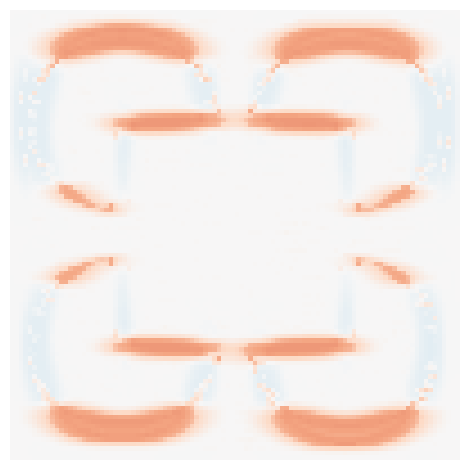

In [81]:
Utils.plot_rb(sol[:,:,8,1,125])

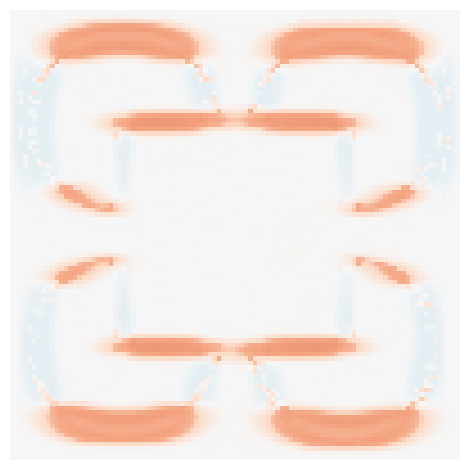

In [82]:
Utils.plot_rb(sol[:,:,8,1,150])

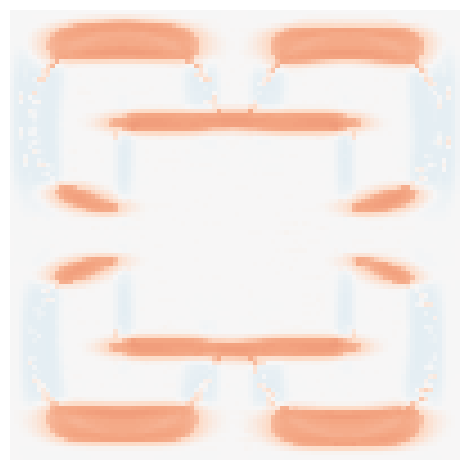

In [83]:
Utils.plot_rb(sol[:,:,8,1,200])

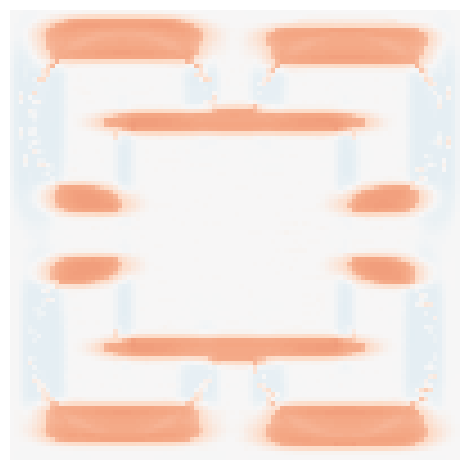

In [84]:
Utils.plot_rb(sol[:,:,8,1,300])

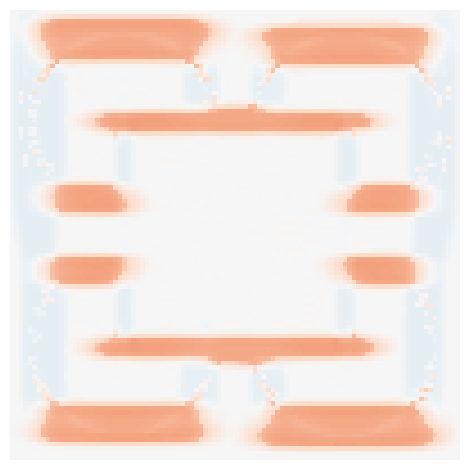

In [85]:
Utils.plot_rb(sol[:,:,8,1,400])

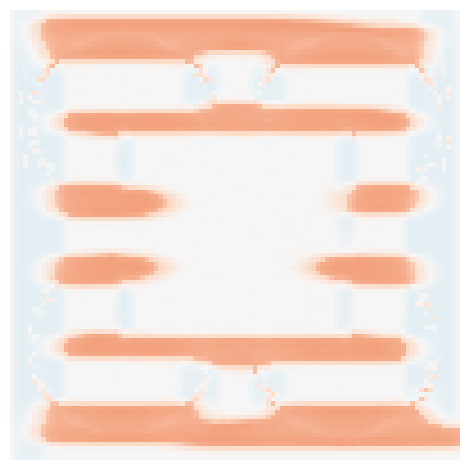

In [86]:
Utils.plot_rb(sol[:,:,8,1,800])

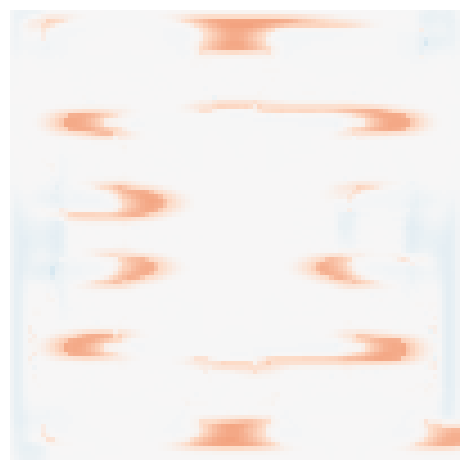

In [87]:
Utils.plot_rb(sol[:,:,8,1,800] .- sol[:,:,8,1,300])

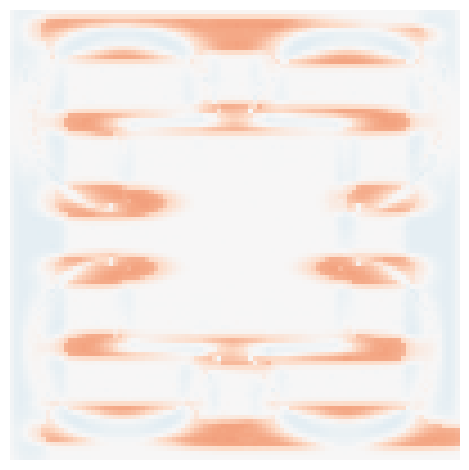

In [88]:
Utils.plot_rb(sol[:,:,8,1,800] .- sol[:,:,8,1,100])

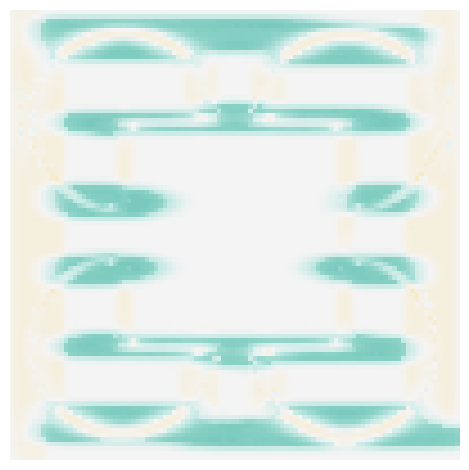

In [104]:
Utils.plot_two(sol[:,:,8,1,800] .- sol[:,:,8,1,50])

In [95]:
using PyPlot

In [9]:
sol= solve(prob)

UndefVarError: UndefVarError: prob not defined

In [100]:
typeof(a)

Array{ColorMap,1}

In [68]:
f = files[2]
batch = 001

1

In [82]:
batch_ = string(batch,"_",rand(1000:9999))

"1_2741"

In [87]:
mkdir(plotsdir(string("batch",batch_)))

"/mnt/storage_1/users/cullinanen/.julia/dev/MEngProject.jl/plots/batch1_2741"

In [76]:
Utils.layers[1]

"L6 (\$x\$)"

In [74]:
plotsdir(string("batch",batch,"_",rand(1000:9999)),f,string(f,"_",t,"_",la[1],".png"))

"/mnt/storage_1/users/cullinanen/.julia/dev/MEngProject.jl/plots/batch1_9059/Iine_gap_1_100_gs.tif/Iine_gap_1_100_gs.tif_800_x.png"

In [50]:
k =11 
t = 800;
axMax=.5
axMin=-.5;

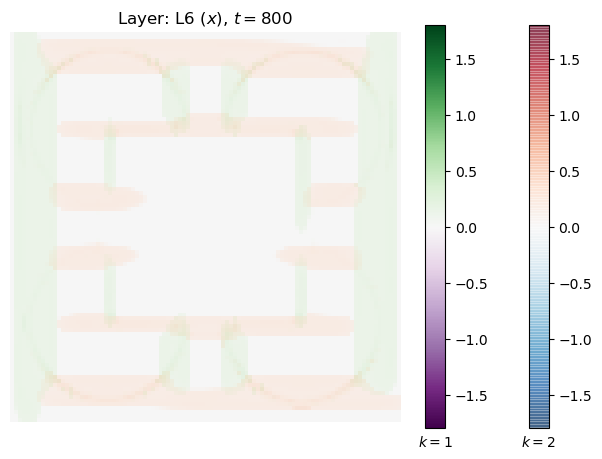

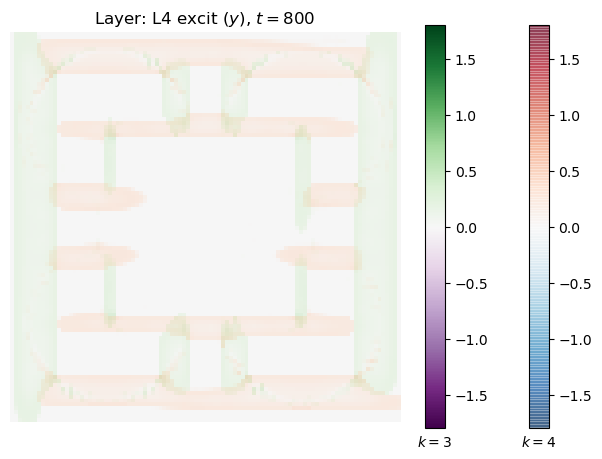

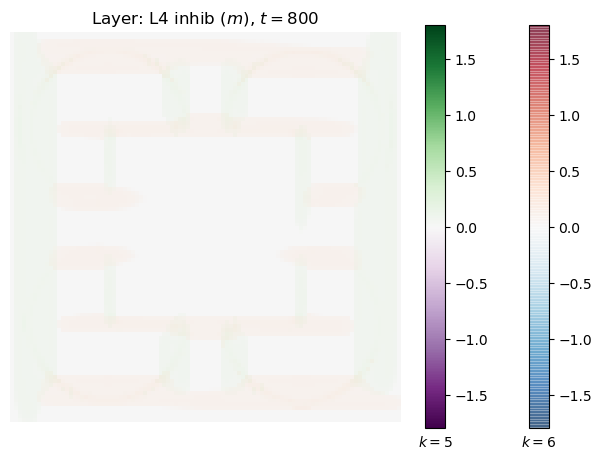

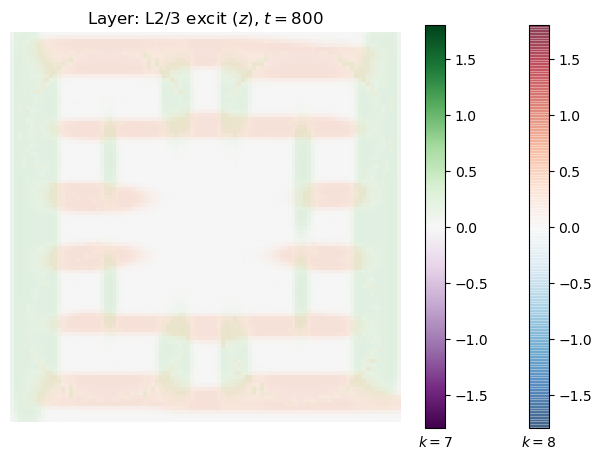

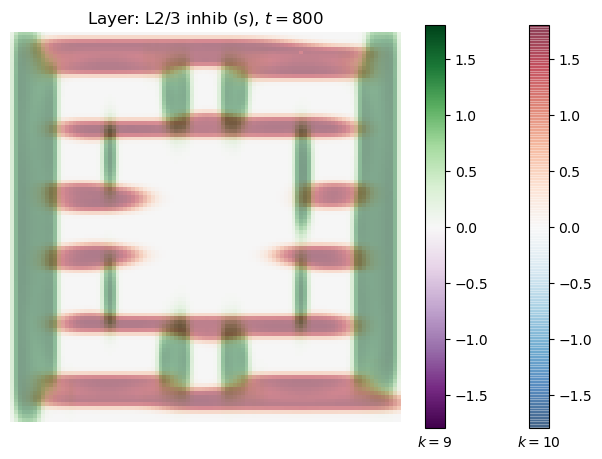

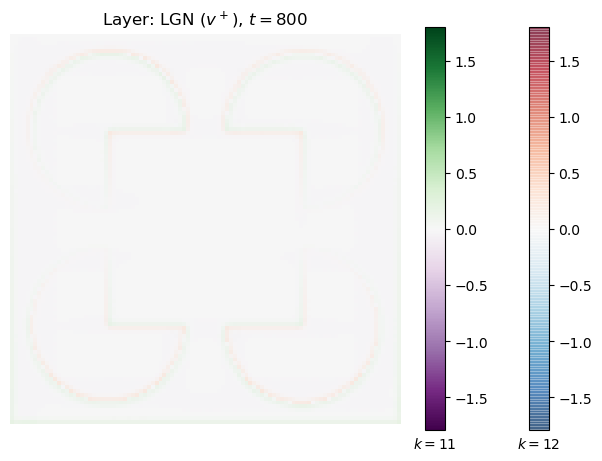

In [94]:
for t ∈ [25,50,100,200,400,800]
    axMax = findmax(sol[:,:,:,1,t])[1]

    for k ∈ 1:2:10
        fig, ax = plt.subplots()
        k2=k+1

        im = ax.imshow(sol[:,:,k,1,t], cmap=matplotlib.cm.PRGn,
                       vmax=axMax, vmin=-axMax)
        im2 = ax.imshow(sol[:,:,k+1,1,t], cmap=matplotlib.cm.RdBu_r,
                       vmax=axMax, vmin=-axMax, alpha=0.5)
        #     if clbar

        cbar = fig.colorbar(im2,  shrink=0.9, ax=ax)
        cbar.ax.set_xlabel("\$k=$k2\$")
                cbar = fig.colorbar(im,  shrink=0.9, ax=ax)
        cbar.ax.set_xlabel("\$k=$k\$")
        #     end
        layer=Utils.layers[k]
            plt.title("Layer: $layer, \$t=$t\$")
            plt.axis("off")
            fig.tight_layout()
        #     plt.show()
        plt.savefig(plotsdir(string("batch",batch_),string(f,"_",t,"_",Utils.la[k],".png")))
    end

    k=11
    fig, ax = plt.subplots()
    k2=k+1
    
    im = ax.imshow(sol[:,:,k,1,t], cmap=matplotlib.cm.PRGn,
                   vmax=axMax, vmin=-axMax)
    im2 = ax.imshow(sol[:,:,k+1,1,t], cmap=matplotlib.cm.RdBu_r,
                   vmax=axMax, vmin=-axMax, alpha=0.5)

    cbar = fig.colorbar(im2,  shrink=0.9, ax=ax)
    cbar.ax.set_xlabel("\$v^-\$")
            cbar = fig.colorbar(im,  shrink=0.9, ax=ax)
    cbar.ax.set_xlabel("\$v^+\$")

    layer=Utils.layers[k]
        plt.title("Layer: $layer, \$t=$t\$")
        plt.axis("off")
        fig.tight_layout()

    plt.savefig(plotsdir(string("batch",batch_),string(f,"_",t,"_",Utils.la[k],".png")))
end

In [138]:
findmax(sol[:,:,k:k+1,1,t])

(0.44345748f0, CartesianIndex(97, 76, 2))

In [159]:
title

L"$\underline{\theta}$"

In [449]:
p = LaminartInitFunc.parameterInit_conv_gpu(datadir("vis_illusionsDS","viper00661.jpg"), Parameters.parameters_f32);

In [16]:
tspan = (0.0f0, 500f0)
u0 = cu(reshape(zeros(Float32, p.dim_i, p.dim_j*(5*p.K+2)), p.dim_i, p.dim_j, 5*p.K+2,1));

arr1 = u0[:, :, 1:p.K,:]
arr2 = u0[:, :, 1:1,:];

f = LaminartFunc.LamFunction(
    similar(arr1), #x
    similar(arr1), #m
    similar(arr1), #s
 similar(arr2), #x_lgn,
similar(arr1), #C,
similar(arr1), #H_z,
similar(arr1), # dy_temp,
similar(arr1), # dm_temp,
similar(arr1), # dz_temp,
similar(arr1), # ds_temp,
similar(arr2), # dv_temp,
similar(arr1), # H_z_temp,
similar(arr2), #  V_temp_1,
similar(arr2), #  V_temp_2,
similar(arr1), #  A_temp,
similar(arr1), #   B_temp
    );

prob = ODEProblem(f, u0, tspan, p);

In [17]:
sol = solve(prob)

retcode: Success
Interpolation: specialized 4th order "free" interpolation
t: 835-element Array{Float32,1}:
   0.0
   1.0f-6
   9.142678f-6
   5.8165686f-5
   0.00028488153
   0.0011421234
   0.003917934
   0.011830136
   0.032601908
   0.08393783
   0.1872685
   0.34435055
   0.5533185
   ⋮
 493.654
 494.21115
 494.77975
 495.37973
 496.0192
 496.69193
 497.37613
 498.0403
 498.65872
 499.23007
 499.79138
 500.0
u: 835-element Array{CuArray{Float32,4},1}:
 [0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0]

[0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0]

[0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0]

...

[0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0]

[0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0]

[0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0]
 [0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … 

In [98]:
a = Nothing

Nothing

In [96]:
sol(1)

100×100×12×1 CuArray{Float32,4}:
[:, :, 1, 1] =
 0.0  0.0          7.78777f-5   0.0          …  0.0          0.0         0.0
 0.0  0.0          0.000105487  0.0             0.0          0.0         0.0
 0.0  0.0          0.000292232  0.0             0.0          0.0         0.0
 0.0  0.0          0.000304538  0.0             0.0          0.0         0.0
 0.0  0.0          0.000244854  0.0             0.0          0.0         0.0
 0.0  0.0          0.000161946  0.0          …  0.0          0.0         0.0
 0.0  0.0          0.000119768  0.0             0.0          0.0         0.0
 0.0  4.37367f-5   0.0          0.0             3.21275f-5   0.0         0.0
 0.0  0.0          0.0          0.000157125     1.58311f-5   0.0         0.0
 0.0  0.0          0.0          0.000200381     0.0          0.0         0.0
 0.0  0.0          0.000100646  0.000154301  …  0.0          0.0         0.0
 0.0  0.000183686  0.0          0.000569059     0.0          0.0         0.0
 0.0  0.000167372  9.25807f-

In [101]:
results = @benchmark 1+1

BenchmarkTools.Trial: 
  memory estimate:  0 bytes
  allocs estimate:  0
  --------------
  minimum time:     0.037 ns (0.00% GC)
  median time:      0.038 ns (0.00% GC)
  mean time:        0.039 ns (0.00% GC)
  maximum time:     0.054 ns (0.00% GC)
  --------------
  samples:          10000
  evals/sample:     1000

In [102]:
BenchmarkTools.save(plotsdir("filename.json"), results)

In [105]:
results.memory

0

In [108]:
results.times

10000-element Array{Float64,1}:
 0.037
 0.037
 0.037
 0.037
 0.037
 0.037
 0.037
 0.037
 0.037
 0.037
 0.037
 0.037
 0.037
 ⋮
 0.04
 0.04
 0.04
 0.04
 0.04
 0.04
 0.04
 0.04
 0.05
 0.052
 0.054
 0.054

In [109]:
results.allocs

0

In [106]:
@profile 1+1

LoadError: UndefVarError: @profile not defined

In [107]:
files

25-element Array{String,1}:
 ".ipynb_checkpoints"
 "Iine_gap_1_100_gs.tif"
 "Iine_gap_2_100_gs.tif"
 "Iine_gap_3_100_gs.tif"
 "Iine_gap_4_100_gs.tif"
 "Iines_gaps_100_gs.tif"
 "diag_dots_100_gs.png"
 "diag_gap_100_gs.tif"
 "kan_sq_cont.png"
 "kan_sq_cont_l.png"
 "mo05709.jpg"
 "stairs_100gs.png"
 "stairs_200gs.png"
 "viper00187.jpg"
 "viper00661.jpg"
 "viper00715.jpg"
 "viper00717.jpg"
 "viper00720.jpg"
 "viper00721.jpg"
 "viper00842.jpg"
 "viper00891.jpg"
 "viper00904.jpg"
 "viper00921.jpg"
 "viper01006.jpg"
 "viper01333.jpg"

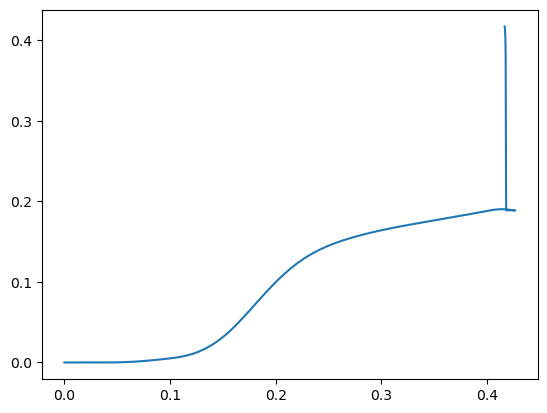

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7faad35fa050>

In [120]:
plot(sol[findmax(sol[:,:,7,1,end])[2][1],findmax(sol[:,:,7,1,end])[2][2],7,1,:],
    sol[findmax(sol[:,:,8,1,end])[2][1],findmax(sol[:,:,8,1,end])[2][2],8,1,:])

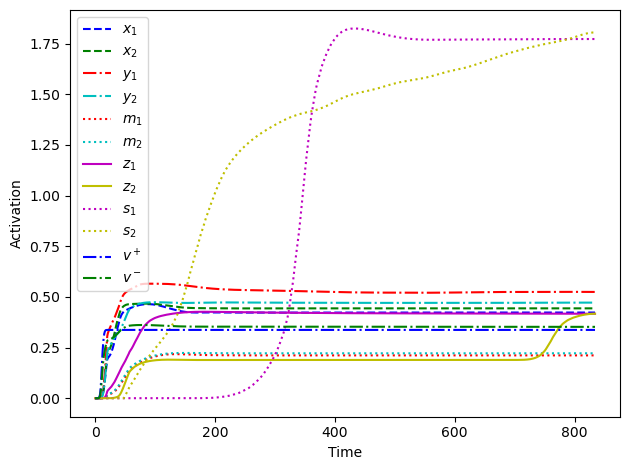

In [141]:
fig, axs = plt.subplots()
lines = ["b--","g--","r-.","c-.","r:","c:","m-","y-","m:","y:","b-.","g-."]
for k ∈ 1:12
    layer=Utils.layers_1[k]
    axs.plot(sol[findmax(sol[:,:,k,1,end])[2][1],findmax(sol[:,:,k,1,end])[2][2],k,1,:],lines[k], label="$layer")
end
axs.set_xlabel("Time")
axs.set_ylabel("Activation")
plt.legend()
fig.tight_layout()

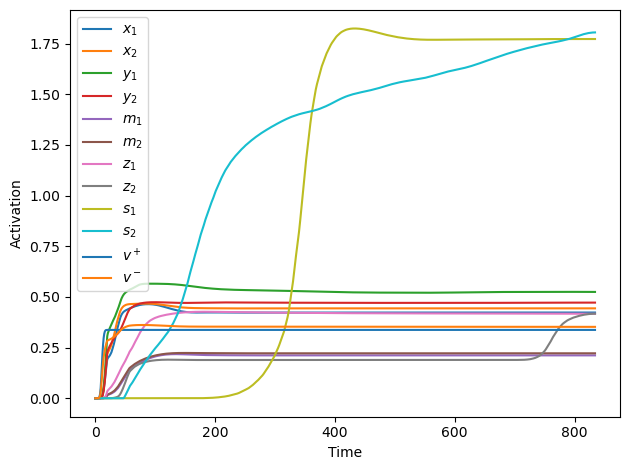

In [142]:
fig, axs = plt.subplots()
lines = ["b--","g--","r-.","c-.","r:","c:","m-","y-","m:","y:","b-.","g-."]
for k ∈ 1:12
    layer=Utils.layers_1[k]
    axs.plot(sol[findmax(sol[:,:,k,1,end])[2][1],findmax(sol[:,:,k,1,end])[2][2],k,1,:],label="$layer")
end
axs.set_xlabel("Time")
axs.set_ylabel("Activation")
plt.legend()
fig.tight_layout()

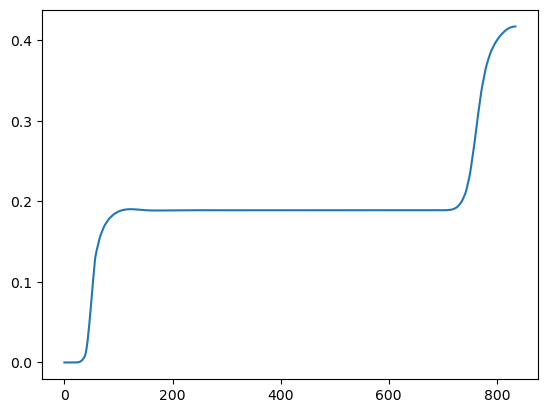

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7faace7cab90>

In [123]:
plot(sol[findmax(sol[:,:,8,1,end])[2][1],findmax(sol[:,:,8,1,end])[2][2],8,1,:])

In [10]:
count = 0
for f in files[2:end]
    count +=1
    LaminartInitFunc.parameterInit_conv_gpu(datadir("img",f), Parameters.parameters_f32);
end

In [150]:
files[2]

"Iine_gap_1_100_gs.tif"

In [189]:
ng = [2, 3, 4, 5, 6, 8, 11, 14, 16, 18, 19]

11-element Array{Int64,1}:
  2
  3
  4
  5
  6
  8
 11
 14
 16
 18
 19

In [193]:
for i ∈ ng 
    print(files[i],"\n")
end

Iine_gap_1_100_gs.tif
Iine_gap_2_100_gs.tif
Iine_gap_3_100_gs.tif
Iine_gap_4_100_gs.tif
Iines_gaps_100_gs.tif
diag_gap_100_gs.tif
mo05709.jpg
viper00187.jpg
viper00715.jpg
viper00720.jpg
viper00721.jpg


In [11]:
f = files[2]

"Iine_gap_1_100_gs.png"

In [16]:
batch = 2
tspan = (0.0f0, 100f0)

batch_ = string(batch,"_",rand(1000:9999))

# for f in files[20:end]
	
	p = LaminartInitFunc.parameterInit_conv_gpu(datadir("img",f), Parameters.parameters_f32);
	
	u0 = cu(reshape(zeros(Float32, p.dim_i, p.dim_j*(5*2+2)), p.dim_i, p.dim_j, 5*2+2,1))
	
	arr1 = u0[:, :, 1:2,:]
arr2 = u0[:, :, 1:1,:];

	f = LaminartFunc.LamFunction(
		similar(arr1), #x
		similar(arr1), #m
		similar(arr1), #s
		similar(arr2), #x_lgn,
		similar(arr1), #C,
		similar(arr1), #H_z,
		similar(arr1), # dy_temp,
		similar(arr1), # dm_temp,
		similar(arr1), # dz_temp,
		similar(arr1), # ds_temp,
		similar(arr2), # dv_temp,
		similar(arr1), # H_z_temp,
		similar(arr2), #  V_temp_1,
		similar(arr2), #  V_temp_2,
		similar(arr1), #  A_temp,
		similar(arr1), #   B_temp
    )

	prob = ODEProblem(f, u0, tspan, p)
# 	@benchmark sol = solve(prob)
	sol = solve(prob)
	
	
	

MethodError: MethodError: no method matching joinpath(::String, ::String, ::String, ::MEngProject.LaminartFunc.LamFunction{CuArray{Float32,4}})
Closest candidates are:
  joinpath(::AbstractString, !Matched::AbstractString...) at path.jl:290
  joinpath(::AbstractString) at path.jl:244

In [8]:
using DrWatson
@quickactivate "MEngProject"
using MEngProject, CUDA, DifferentialEquations, PyPlot, NNlib,  ImageFiltering, Images, MEngProject.LaminartKernels, MEngProject.LaminartInitFunc, MEngProject.Utils, BenchmarkTools, Test
using OrdinaryDiffEq, ParameterizedFunctions, LSODA, Sundials, DiffEqDevTools, Noise

batch = 1


files = readdir(datadir("img"))

tspan = (0.0f0, 100f0)

batch_ = string(batch,"_",rand(1000:9999))
mkdir(plotsdir(string("batch",batch_)))

"/mnt/storage_1/users/cullinanen/.julia/dev/MEngProject.jl/plots/batch1_8652"

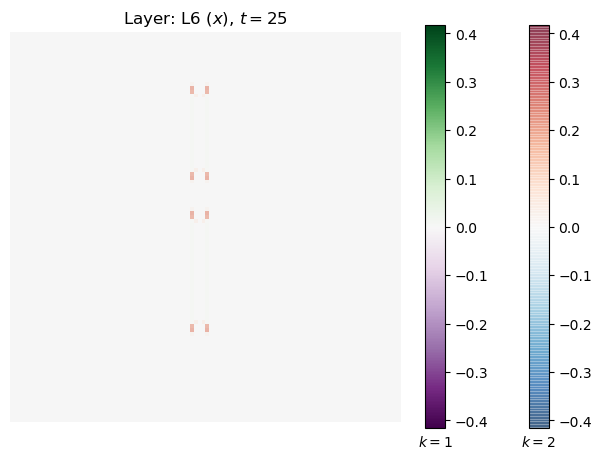

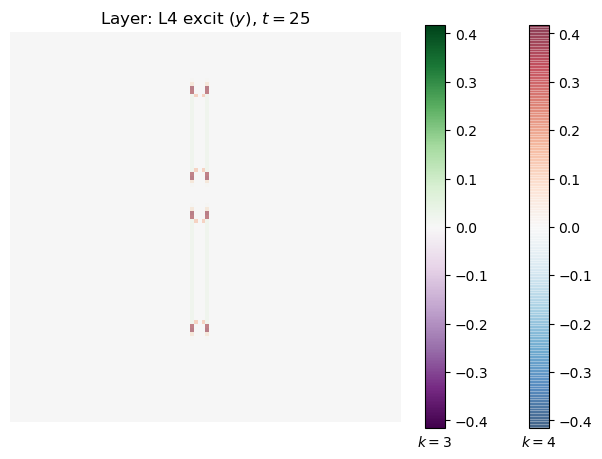

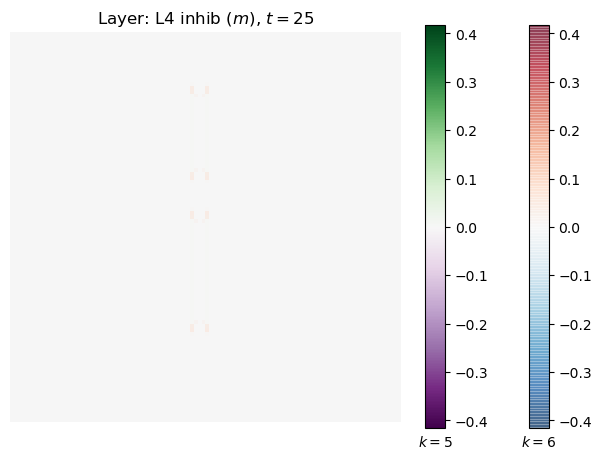

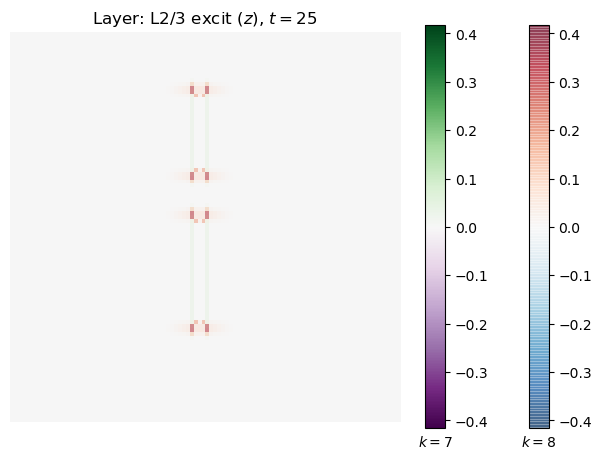

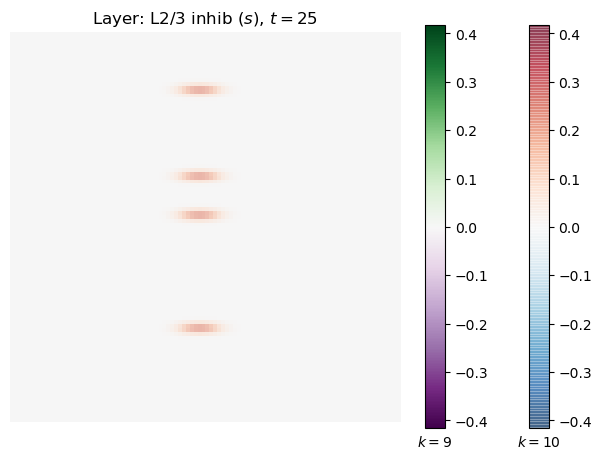

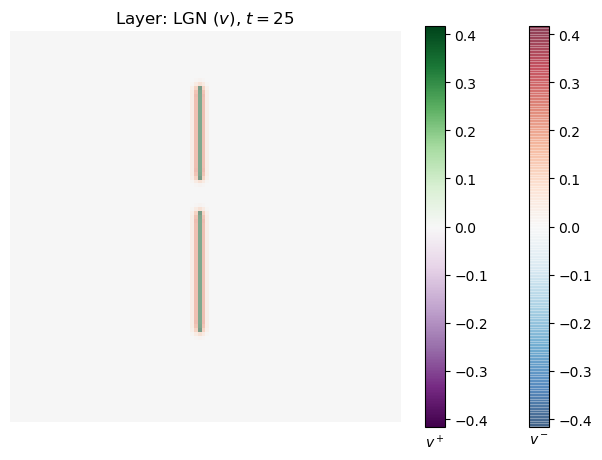

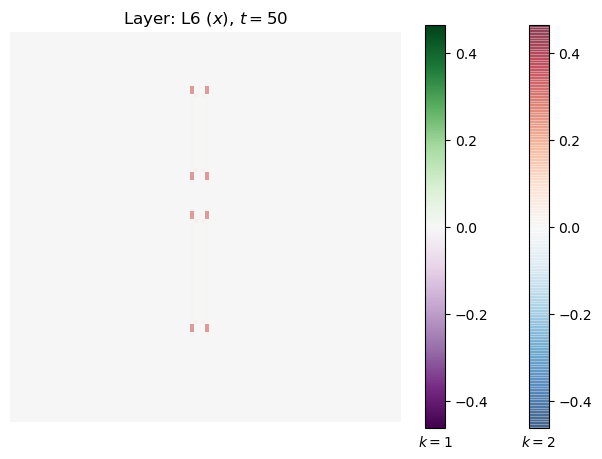

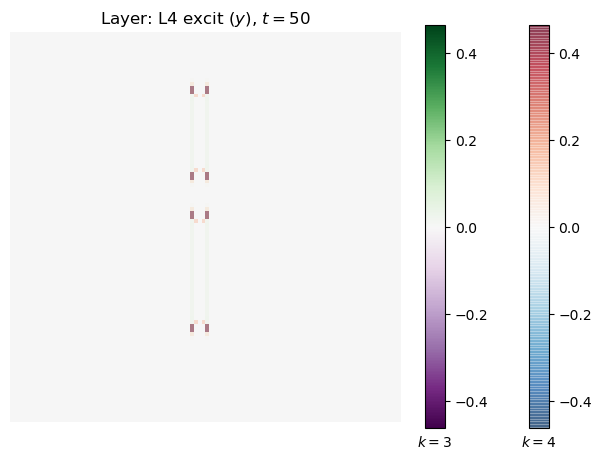

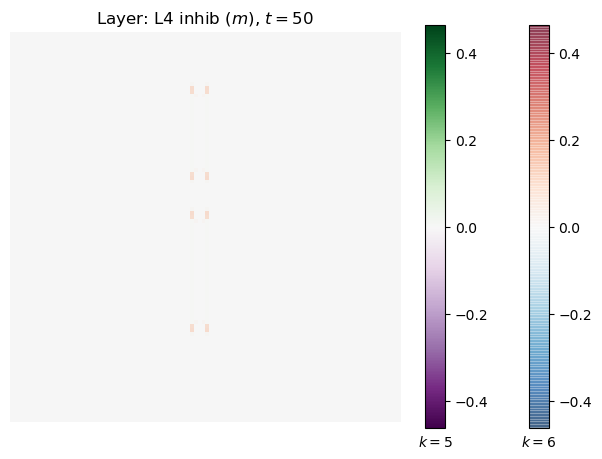

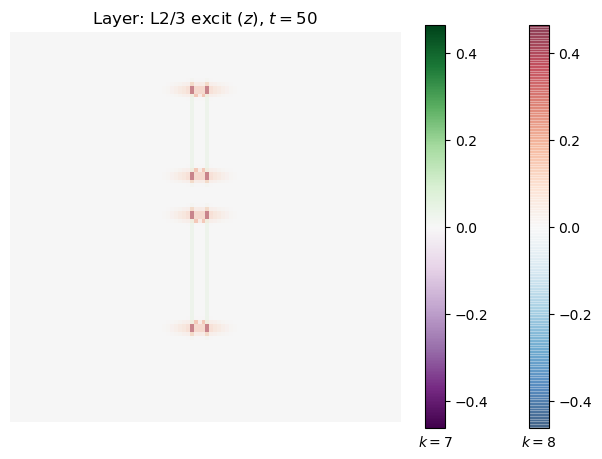

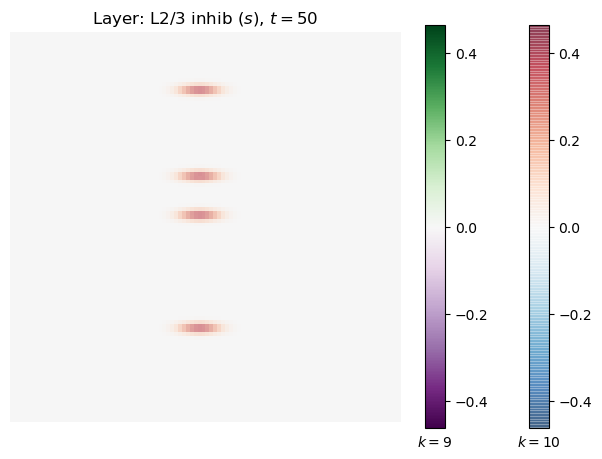

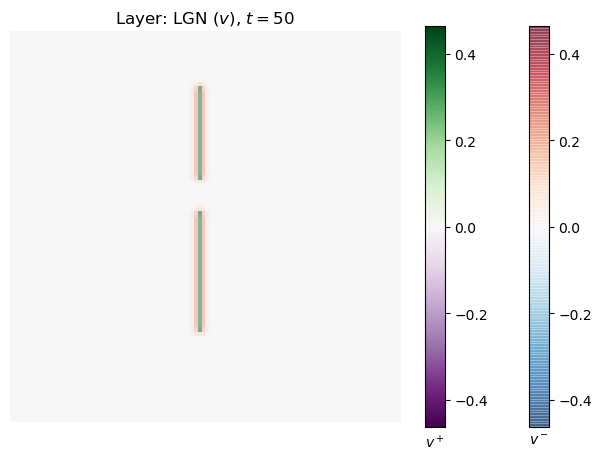

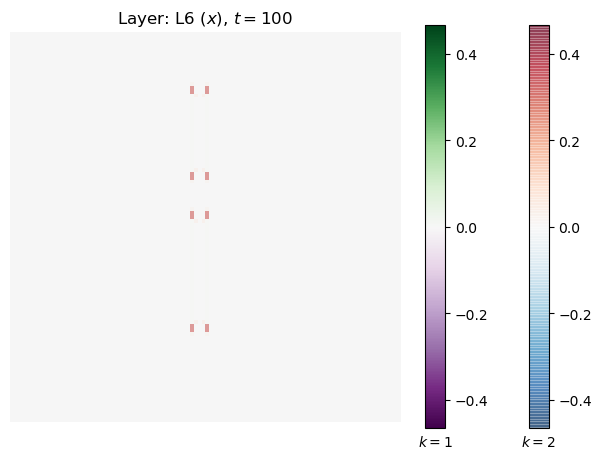

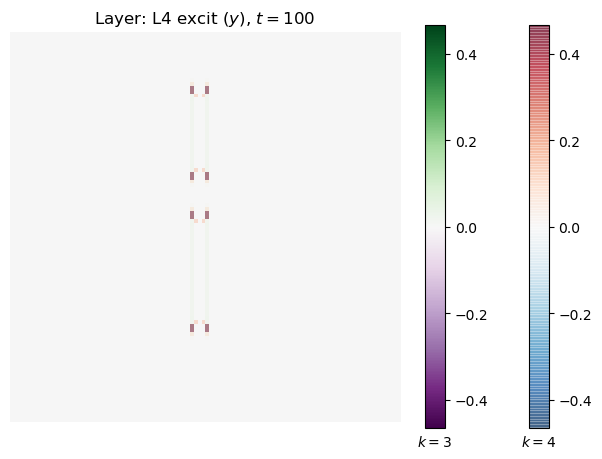

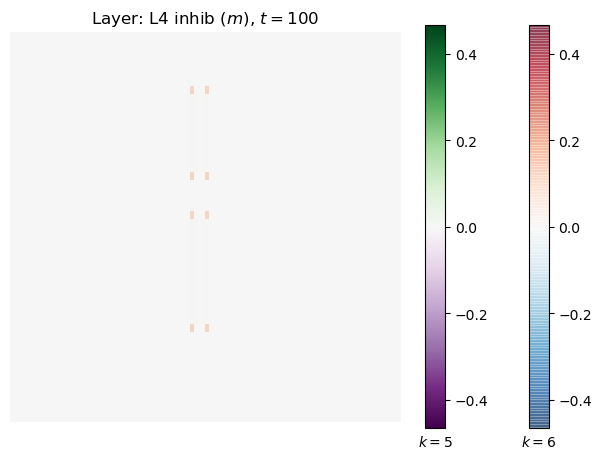

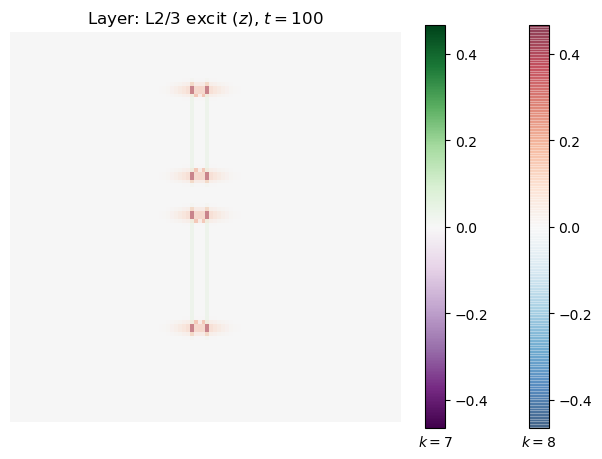

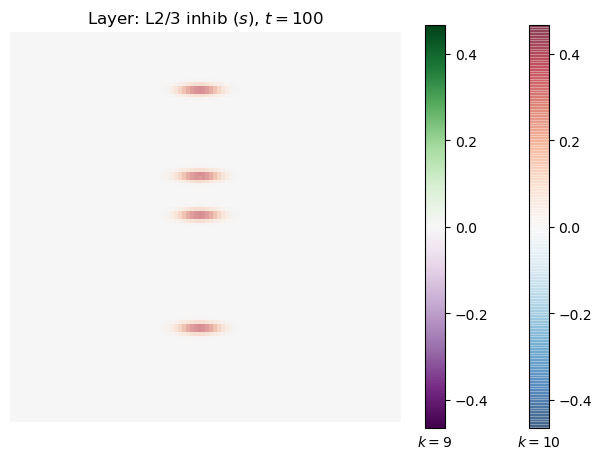

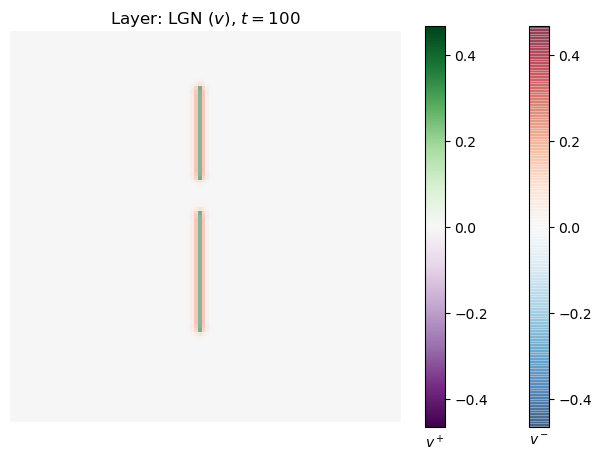

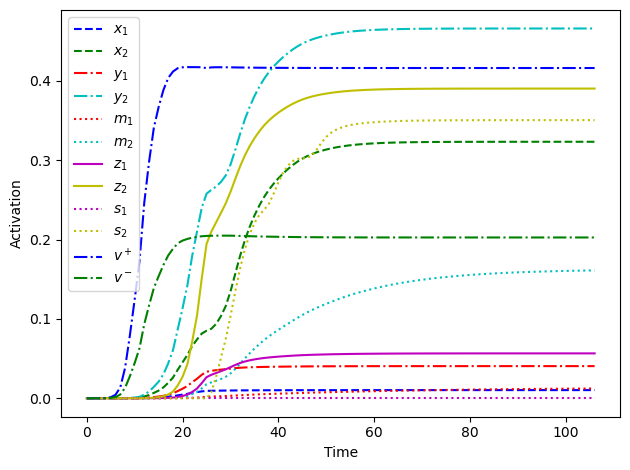

In [9]:
for file in files[2:2]
	
	p = LaminartInitFunc.parameterInit_conv_gpu(datadir("img",file), Parameters.parameters_f32);
	
	u0 = cu(reshape(zeros(Float32, p.dim_i, p.dim_j*(5*2+2)), p.dim_i, p.dim_j, 5*2+2,1))
	
	arr1 = u0[:, :, 1:2,:]
arr2 = u0[:, :, 1:1,:];

	f = LaminartFunc.LamFunction(
		similar(arr1), #x
		similar(arr1), #m
		similar(arr1), #s
		similar(arr2), #x_lgn,
		similar(arr1), #C,
		similar(arr1), #H_z,
		similar(arr1), # dy_temp,
		similar(arr1), # dm_temp,
		similar(arr1), # dz_temp,
		similar(arr1), # ds_temp,
		similar(arr2), # dv_temp,
		similar(arr1), # H_z_temp,
		similar(arr2), #  V_temp_1,
		similar(arr2), #  V_temp_2,
		similar(arr1), #  A_temp,
		similar(arr1), #   B_temp
    )

	prob = ODEProblem(f, u0, tspan, p)
# 	@benchmark sol = solve(prob)
	sol = solve(prob)
	
	
# 	for t ∈ [25,50,100,200,400,800]
			for t ∈ [25,50,100]


		axMax = findmax(sol(t)[:,:,:,1])[1]

		for k ∈ 1:2:10
			fig, ax = plt.subplots()
			k2=k+1

			im = ax.imshow(sol(t)[:,:,k,1], cmap=matplotlib.cm.PRGn,
						   vmax=axMax, vmin=-axMax)
			im2 = ax.imshow(sol(t)[:,:,k+1,1], cmap=matplotlib.cm.RdBu_r,
						   vmax=axMax, vmin=-axMax, alpha=0.5)

			cbar = fig.colorbar(im2,  shrink=0.9, ax=ax)
			cbar.ax.set_xlabel("\$k=$k2\$")
					cbar = fig.colorbar(im,  shrink=0.9, ax=ax)
			cbar.ax.set_xlabel("\$k=$k\$")
			layer=Utils.layers[k]
				plt.title("Layer: $layer, \$t=$t\$")
				plt.axis("off")
				fig.tight_layout()
			plt.savefig(plotsdir(string("batch",batch_),string("file","_",t,"_",Utils.la[k],".png")))
# 			plt.savefig(plotsdir(string("batch",batch_),string("file","_",t,"_",Utils.la[k],".png")))
		end

		k=11
		fig, ax = plt.subplots()
		k2=k+1

		im = ax.imshow(sol[:,:,k,1,t], cmap=matplotlib.cm.PRGn,
					   vmax=axMax, vmin=-axMax)
		im2 = ax.imshow(sol[:,:,k+1,1,t], cmap=matplotlib.cm.RdBu_r,
					   vmax=axMax, vmin=-axMax, alpha=0.5)

		cbar = fig.colorbar(im2,  shrink=0.9, ax=ax)
		cbar.ax.set_xlabel("\$v^-\$")
				cbar = fig.colorbar(im,  shrink=0.9, ax=ax)
		cbar.ax.set_xlabel("\$v^+\$")

		layer=Utils.layers[k]
			plt.title("Layer: $layer, \$t=$t\$")
			plt.axis("off")
			fig.tight_layout()

# 		plt.savefig(plotsdir(string("batch",batch_),string(file,"_",t,"_",Utils.la[k],".png")))
	end
	
	
# time plot
	fig, axs = plt.subplots()
	lines = ["b--","g--","r-.","c-.","r:","c:","m-","y-","m:","y:","b-.","g-."]
	for k ∈ 1:12
		layer=Utils.layers_1[k]
		axs.plot(sol[findmax(sol[:,:,k,1,end])[2][1],findmax(sol[:,:,k,1,end])[2][2],k,1,:],lines[k], label="$layer")
	end
	axs.set_xlabel("Time")
	axs.set_ylabel("Activation")
	plt.legend()
	fig.tight_layout()
# 	plt.savefig(plotsdir(string("batch",batch_),string(file,"_time.png")))
end